In [2]:
import imgtda
from imgtda import standard_analysis as sa
from imgtda import computer_vision as cv

import denali
import sys

from graphviz import Digraph

sys.version

import numpy as np
import pandas as pd
from scipy import misc
from skimage import morphology as morph
from skimage import measure
import scipy
from scipy import ndimage as ndi
from PIL import Image
from scipy import ndimage

from matplotlib import pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.animation as animation

%matplotlib inline


import warnings
warnings.filterwarnings('ignore')

import pprint as pp

from pylab import *
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.cbook import get_sample_data
from matplotlib._png import read_png

In [3]:
sys.path

['',
 '/Users/birdbrain/anaconda/lib/python2.7/site-packages/denali-1.0-py2.7.egg',
 '/Users/birdbrain/anaconda/lib/python27.zip',
 '/Users/birdbrain/anaconda/lib/python2.7',
 '/Users/birdbrain/anaconda/lib/python2.7/plat-darwin',
 '/Users/birdbrain/anaconda/lib/python2.7/plat-mac',
 '/Users/birdbrain/anaconda/lib/python2.7/plat-mac/lib-scriptpackages',
 '/Users/birdbrain/anaconda/lib/python2.7/lib-tk',
 '/Users/birdbrain/anaconda/lib/python2.7/lib-old',
 '/Users/birdbrain/anaconda/lib/python2.7/lib-dynload',
 '/Users/birdbrain/anaconda/lib/python2.7/site-packages/Sphinx-1.3.1-py2.7.egg',
 '/Users/birdbrain/anaconda/lib/python2.7/site-packages',
 '/Users/birdbrain/anaconda/lib/python2.7/site-packages/PIL',
 '/Users/birdbrain/anaconda/lib/python2.7/site-packages/aeosa',
 '/Users/birdbrain/anaconda/lib/python2.7/site-packages/setuptools-27.2.0-py2.7.egg',
 '/Users/birdbrain/anaconda/lib/python2.7/site-packages/IPython/extensions',
 '/Users/birdbrain/.ipython']

## Set Up Project

In [4]:
myproject = imgtda.Project

# r4000_2015_09_16_fast
# r4000_2016_11_01_superfast

myproject['directory'] = '/Users/birdbrain/Documents/Research/Projects/Schatz/Data/g21chaotic/r4000_2016_11_01_superfast'
myproject['bmp_format'] = 'g21flow/bmps/%06d.bmp'
myproject['pd_sub_format'] = 'g21flow/pd_sub/%06d.csv'
myproject['pd_sup_format'] = 'g21flow/pd_sup/%06d.csv'
myproject['additional_data'] = {'lyap_format':'g21per/bmps_abs_val/%05d.bmp',
                                'delta':10,
                                'lyap_out_format':'g21per/bmps_abs_val_smooth_6/%05d.bmp',
                                'lyap_pdsub_format':'g21per/pd_sub_smooth_6/%05d.csv'}


## Utility Functions

In [5]:
def load_image_data(project, idx):
    
    im = imgtda.image.load_image_from_file(project['directory'] + "/" + (project['bmp_format'] % idx))
    im.load_sublevel_pd(project['directory'] + "/" + (project['pd_sub_format'] % idx))
    im.load_superlevel_pd(project['directory'] + "/" + (project['pd_sup_format'] % idx))
    return im


def cropping_region():

    c = np.zeros((421,421))
    centerx = 210
    centery = 210
    radius=200
    for i in range(c.shape[0]):
        for j in range(c.shape[1]):
            if ((i-centerx)**2 + (j-centery)**2 < radius**2):
                c[i,j] = 1
    c = c.astype(np.int)
    return c



# Compute interleaving between two images

1000
1010
1020
1030
1040
1050
1060
1070
1080
1090
1100
1110
1120
1130
1140
1150
1160
1170
1180
1190
1200
1210
1220
1230
1240
1250
1260
1270
1280
1290
1300
1310
1320
1330
1340
1350
1360
1370
1380
1390
1400
1410
1420
1430
1440
1450
1460
1470
1480
1490
1500
1510
1520
1530
1540
1550
1560
1570
1580
1590
1600
1610
1620
1630
1640
1650
1660
1670
1680
1690
1700
1710
1720
1730
1740
1750
1760
1770
1780
1790
1800
1810
1820
1830
1840
1850
1860
1870
1880
1890
1900
1910
1920
1930
1940
1950
1960
1970
1980
1990
2000
2010
2020
2030
2040
2050
2060
2070
2080
2090
2100
2110
2120
2130
2140
2150
2160
2170
2180
2190
2200
2210
2220
2230
2240
2250
2260
2270
2280
2290
2300
2310
2320
2330
2340
2350
2360
2370
2380
2390
2400
2410
2420
2430
2440
2450
2460
2470
2480
2490
2500
2510
2520
2530
2540
2550
2560
2570
2580
2590
2600
2610
2620
2630
2640
2650
2660
2670
2680
2690
2700
2710
2720
2730
2740
2750
2760
2770
2780
2790
2800
2810
2820
2830
2840
2850
2860
2870
2880
2890
2900
2910
2920
2930
2940
2950
2960
2970
2980
2990


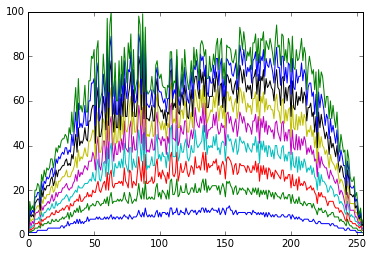

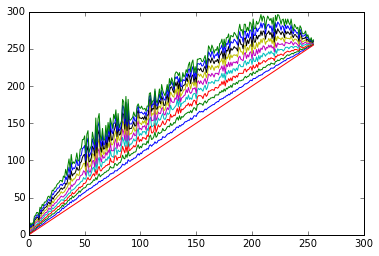

In [95]:
skips = range(1,10)
max_diffs = np.zeros((256, len(skips)))

for idx in range(1000,4001, 10):
    
    print idx
    
    for skip in range(len(skips)):

        im1 = load_image_data(myproject, idx)
        im2 = load_image_data(myproject, idx+skips[skip])

        diff = abs(im1.bmp.astype(float) - im2.bmp.astype(float))

        for i in range(256):
            levelset = (im1.bmp==i)
            if diff[levelset] <> []:
                max_diffs[i, skip] = max(max_diffs[i, skip], max(diff[levelset]))

plt.plot(max_diffs)
plt.xlim((0,255))
plt.show()

plt.plot(np.tile(np.asarray(range(256)), (max_diffs.shape[1], 1)).T + max_diffs)
plt.plot(np.asarray(range(256)))
plt.show()

## Generate watershed poset

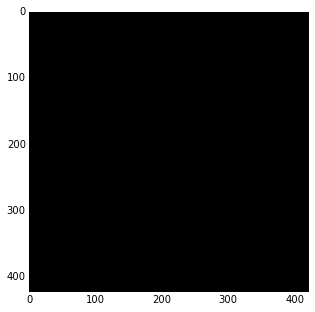

256 0 0
[0]


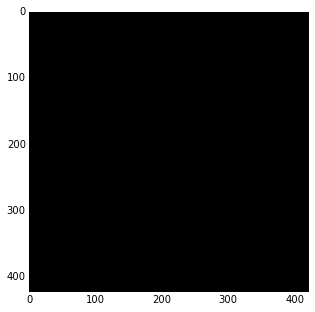

255 0 0
[0]


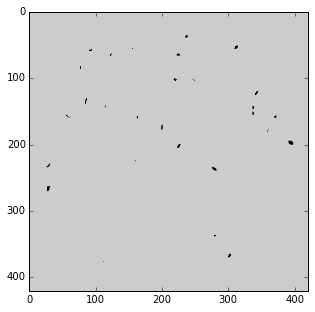

254 0 -1
[-1  0]


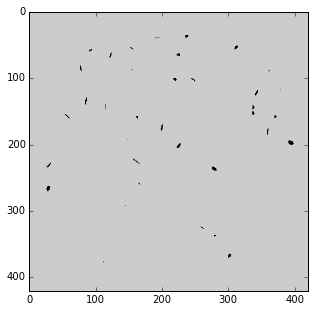

253 0 -1
[-1  0]


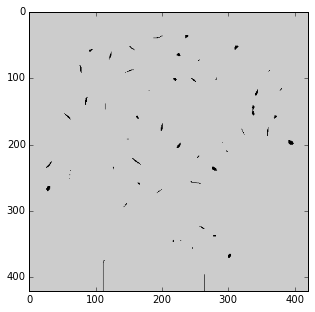

252 0 -1
[-1  0]


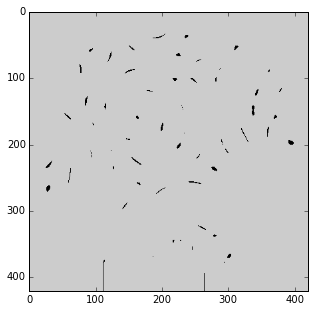

251 0 -1
[-1  0]


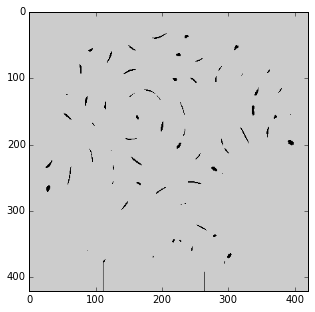

250 0 -1
[-1  0]


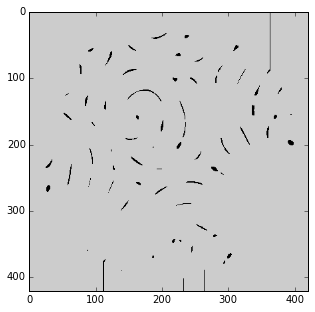

249 0 -1
[-1  0]


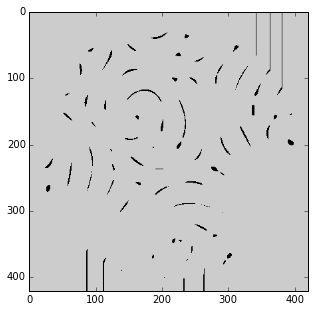

248 0 -1
[-1  0]


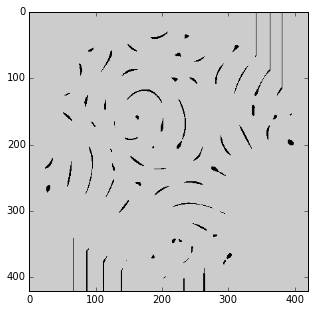

247 0 -1
[-1  0]


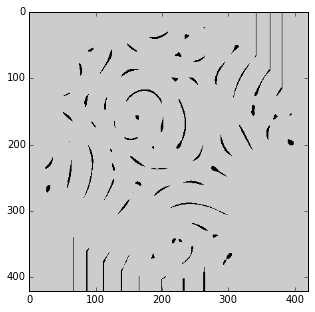

246 0 -1
[-1  0]


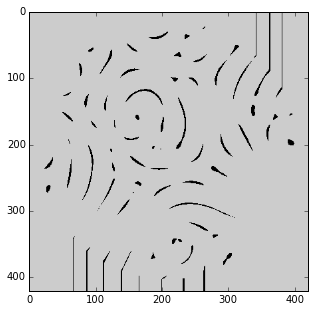

245 0 -1
[-1  0]


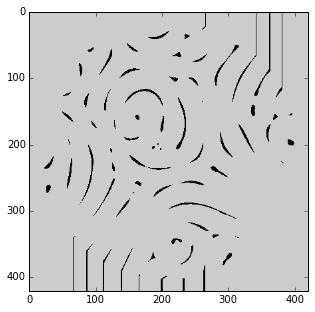

244 0 -1
[-1  0]


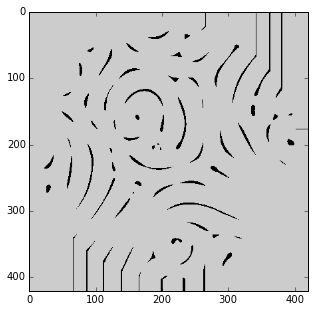

243 0 -1
[-1  0]


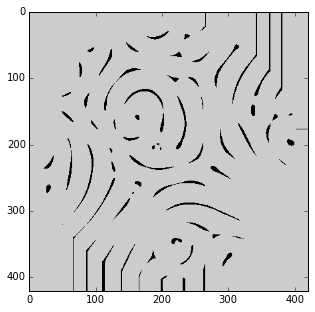

242 0 -1
[-1  0]


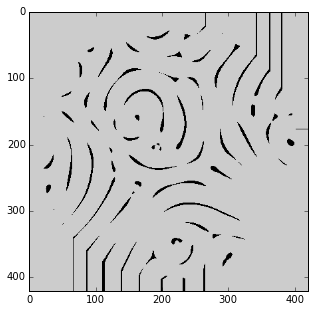

241 0 -1
[-1  0]


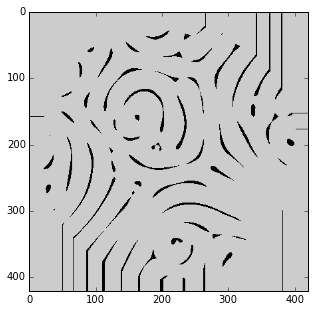

240 0 -1
[-1  0]


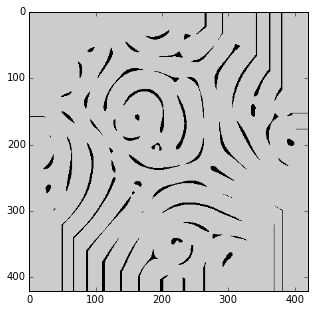

239 0 -1
[-1  0]


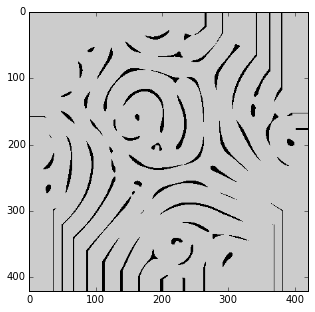

238 0 -1
[-1  0]


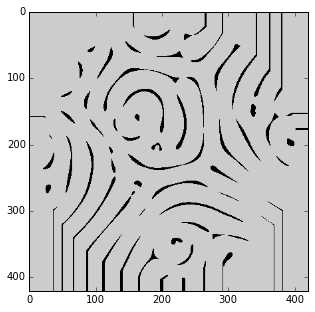

237 0 -1
[-1  0]


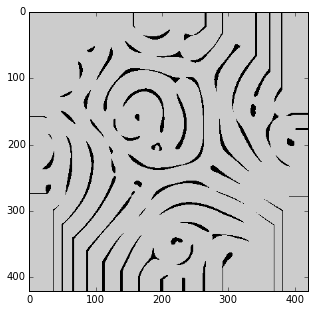

236 0 -1
[-1  0]


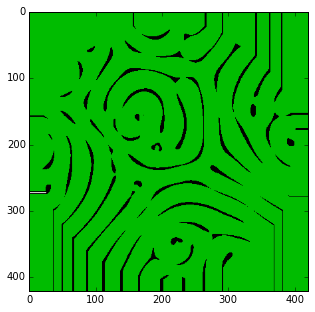

235 1 -1
[-1  0  1]
component #-1


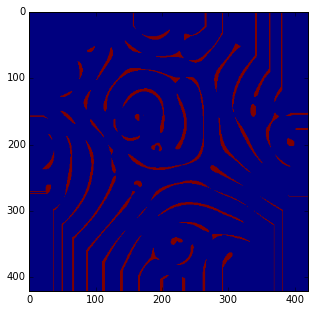

component #0


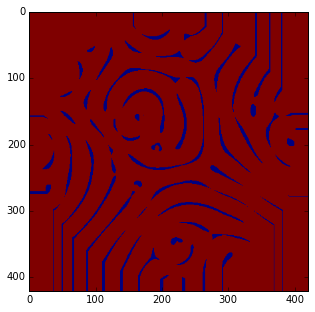

component #1


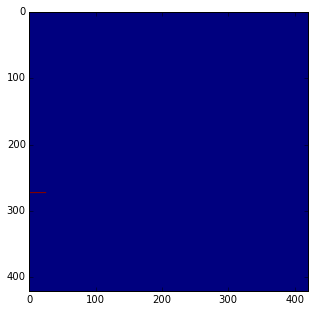

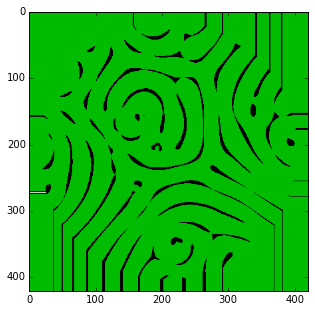

234 1 -1
[-1  0  1]


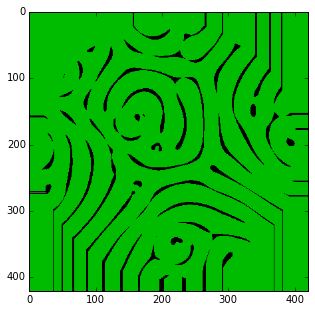

233 1 -1
[-1  0  1]


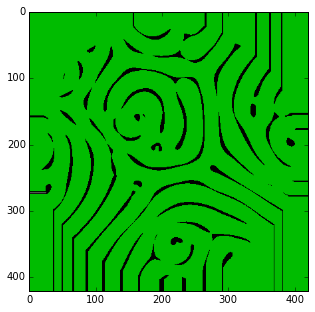

232 1 -1
[-1  0  1]


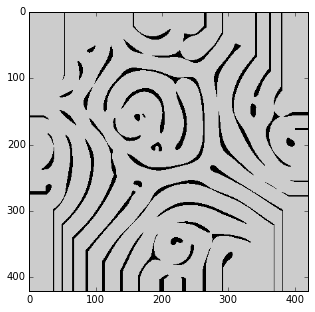

231 0 -1
[-1  0]


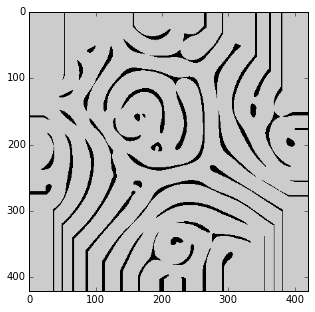

230 0 -1
[-1  0]


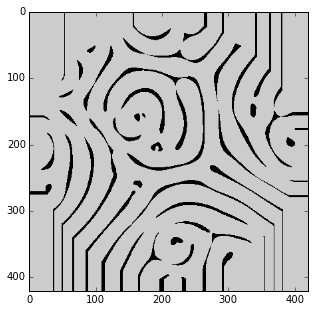

229 0 -1
[-1  0]


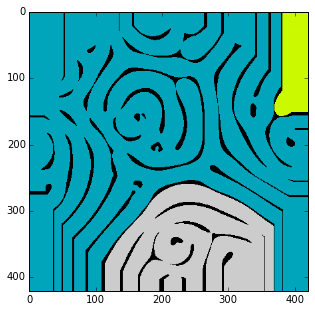

228 2 -1
[-1  0  1  2]


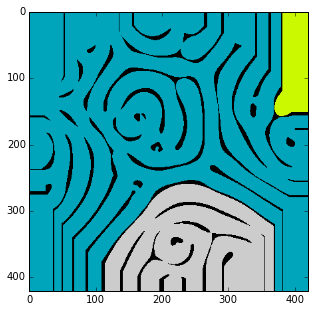

227 2 -1
[-1  0  1  2]


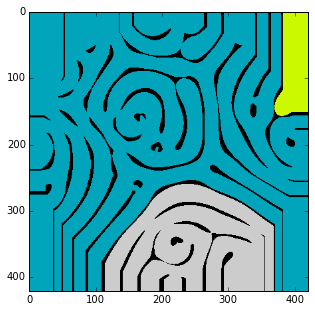

226 2 -1
[-1  0  1  2]


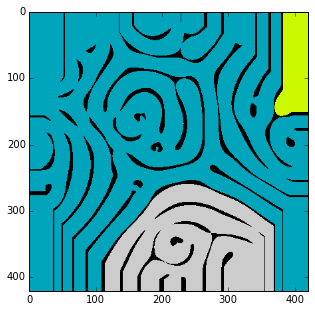

225 2 -1
[-1  0  1  2]


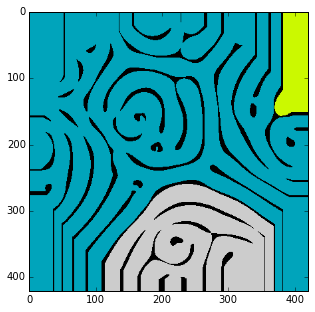

224 2 -1
[-1  0  1  2]


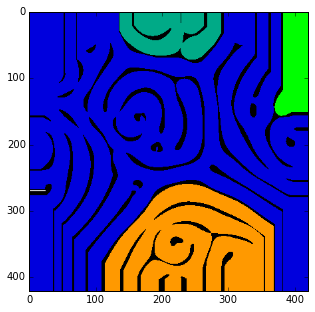

223 4 -1
[-1  0  1  2  3  4]


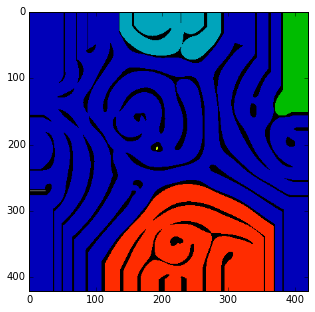

222 5 -1
[-1  0  1  2  3  4  5]


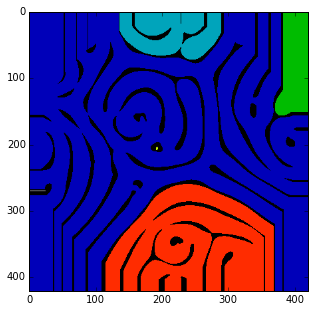

221 5 -1
[-1  0  1  2  3  4  5]


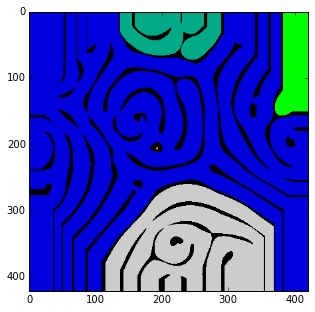

220 4 -1
[-1  0  1  2  3  4]


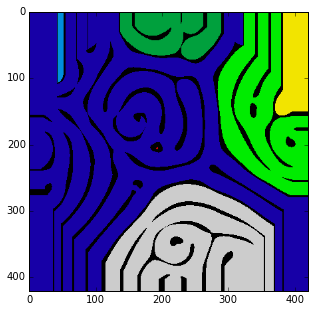

219 6 -1
[-1  0  1  2  3  4  5  6]


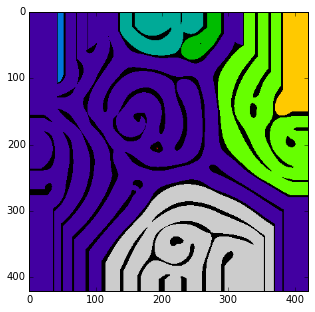

218 7 -1
[-1  0  1  2  3  4  5  6  7]


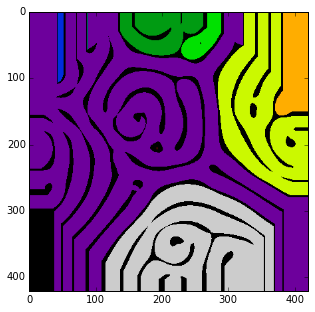

217 8 -1
[-1  0  1  2  3  4  5  6  7  8]


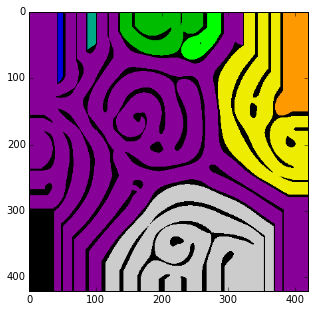

216 9 -1
[-1  0  1  2  3  4  5  6  7  8  9]


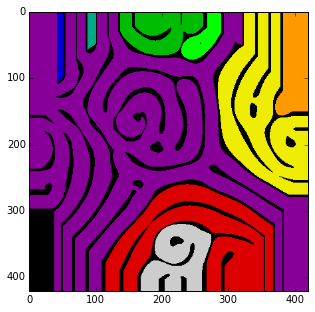

215 9 -1
[-1  0  1  2  3  4  5  6  7  8  9]


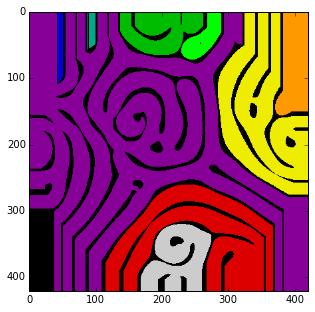

214 9 -1
[-1  0  1  2  3  4  5  6  7  8  9]


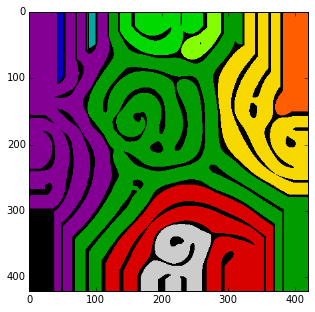

213 10 -1
[-1  0  1  2  3  4  5  6  7  8  9 10]


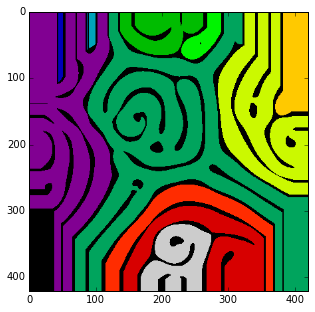

212 11 -1
[-1  0  1  2  3  4  5  6  7  8  9 10 11]


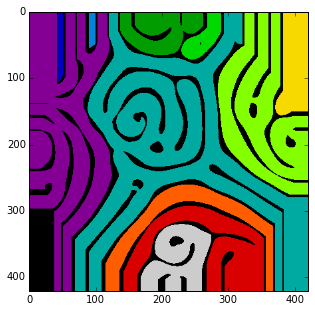

211 10 -1
[-1  0  1  2  3  4  5  6  7  8  9 10]


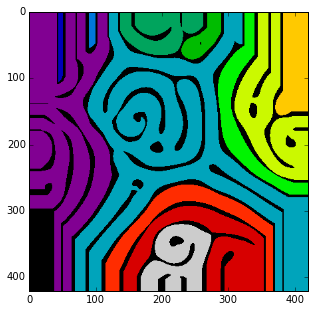

210 11 -1
[-1  0  1  2  3  4  5  6  7  8  9 10 11]


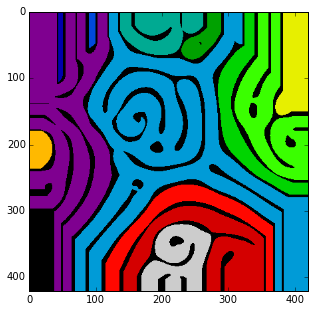

209 12 -1
[-1  0  1  2  3  4  5  6  7  8  9 10 11 12]


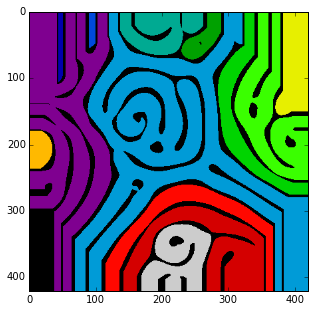

208 12 -1
[-1  0  1  2  3  4  5  6  7  8  9 10 11 12]


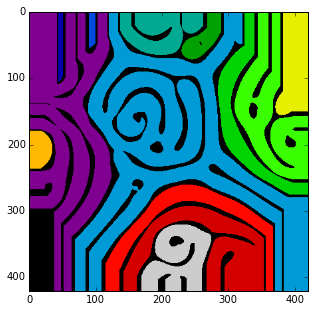

207 12 -1
[-1  0  1  2  3  4  5  6  7  8  9 10 11 12]


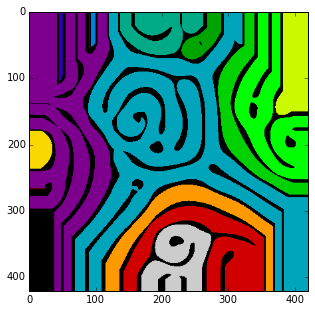

206 14 -1
[-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]


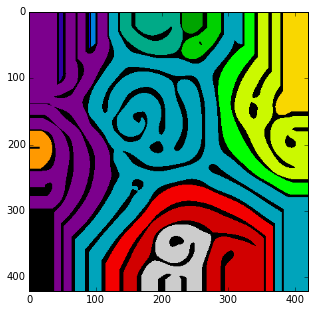

205 14 -1
[-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]


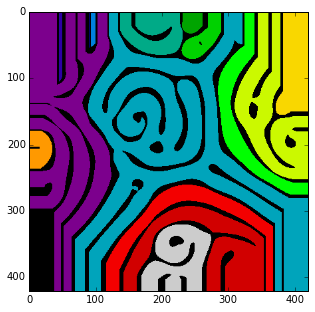

204 14 -1
[-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]


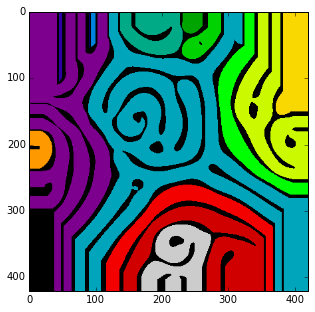

203 14 -1
[-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]


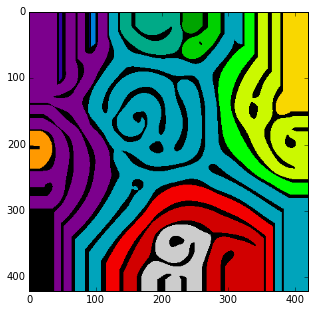

202 14 -1
[-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]


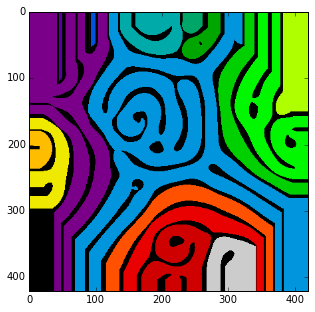

201 16 -1
[-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16]


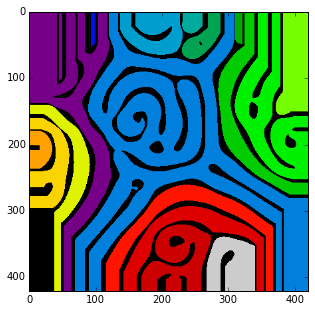

200 18 -1
[-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18]


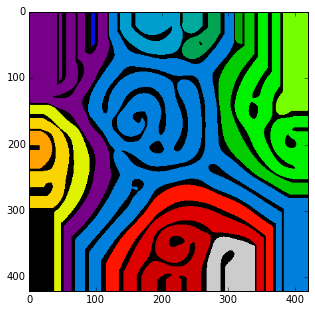

199 18 -1
[-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18]


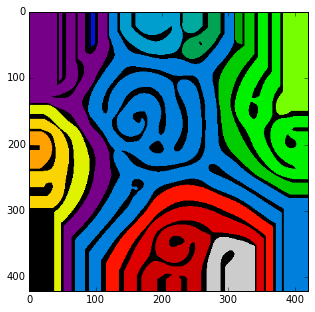

198 18 -1
[-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18]


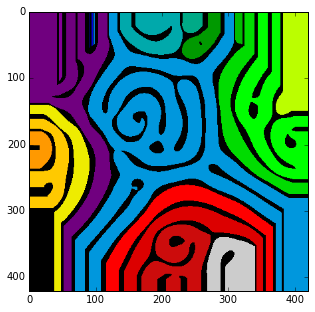

197 19 -1
[-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]


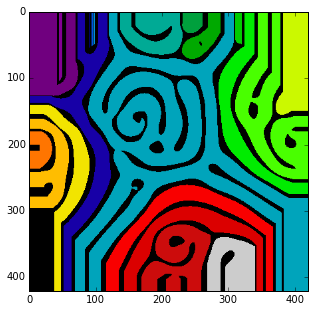

196 20 -1
[-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]


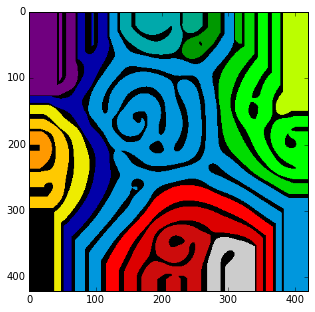

195 19 -1
[-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]


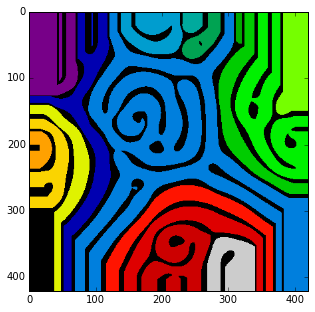

194 18 -1
[-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18]


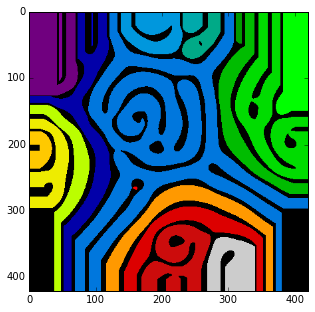

193 19 -1
[-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]


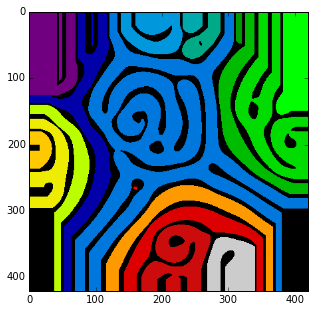

192 19 -1
[-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]


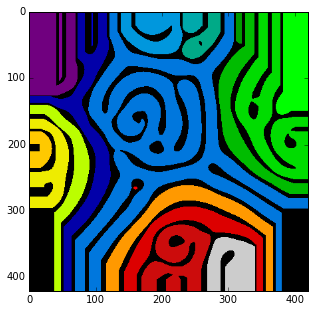

191 19 -1
[-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]


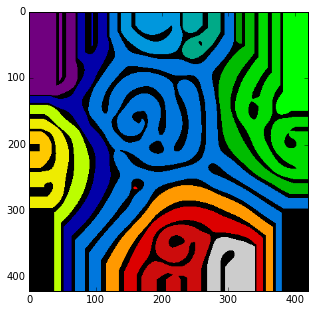

190 19 -1
[-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]


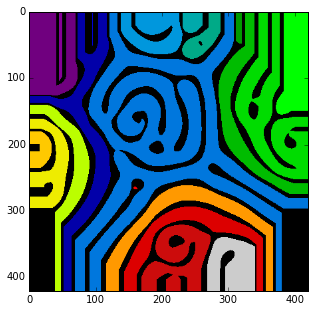

189 19 -1
[-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]


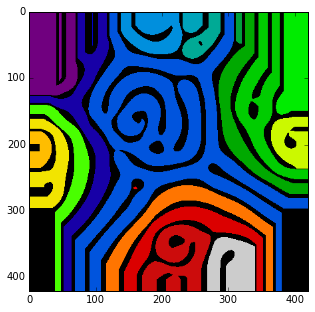

188 20 -1
[-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]


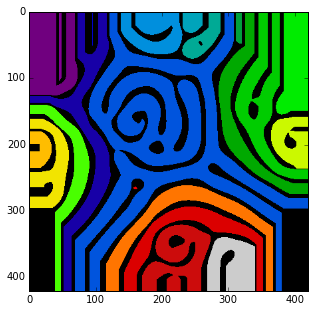

187 20 -1
[-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]


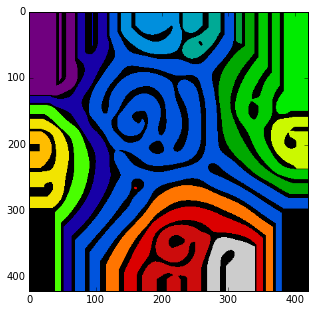

186 20 -1
[-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]


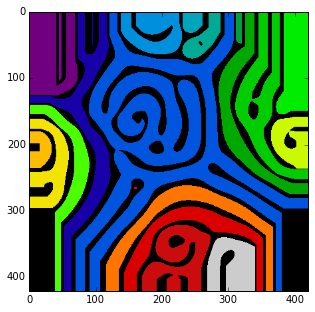

185 20 -1
[-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]


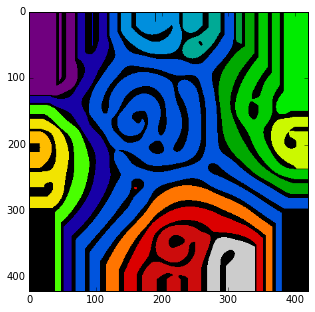

184 20 -1
[-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]


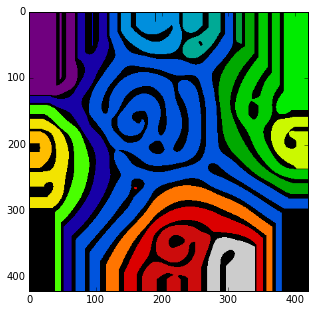

183 20 -1
[-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]


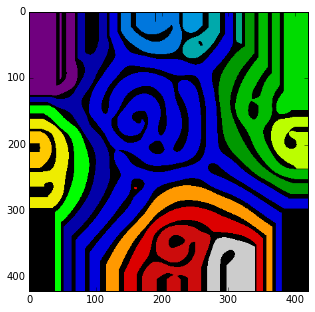

182 19 -1
[-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]


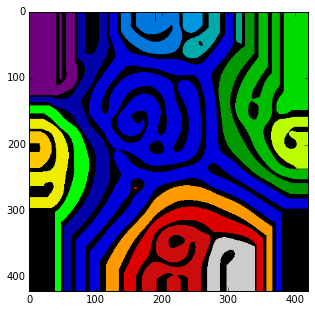

181 19 -1
[-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]


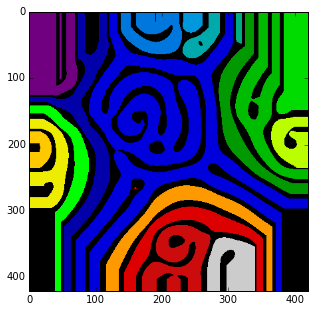

180 19 -1
[-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]


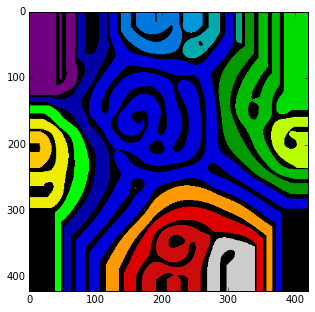

179 19 -1
[-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]


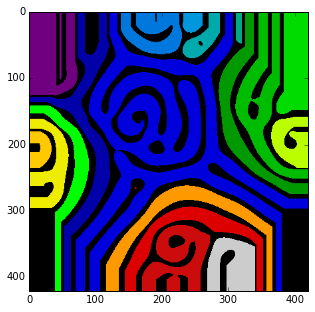

178 19 -1
[-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]


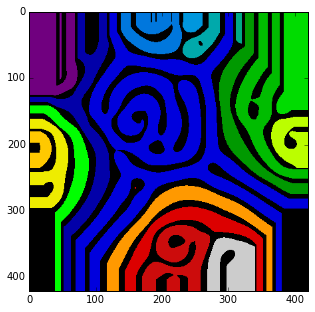

177 19 -1
[-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]


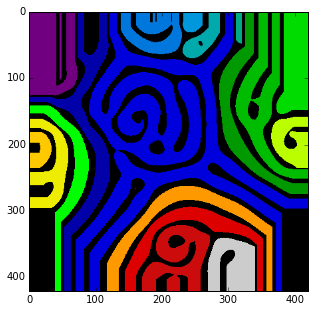

176 19 -1
[-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]


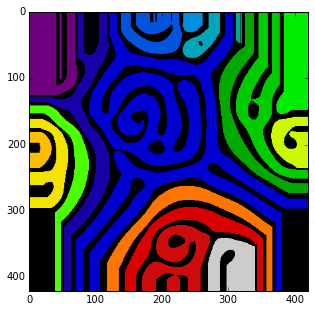

175 20 -1
[-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]


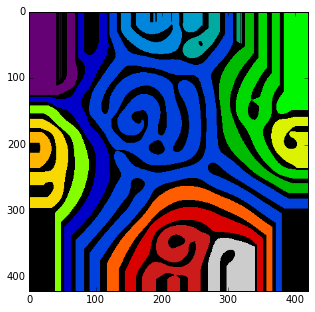

174 21 -1
[-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]


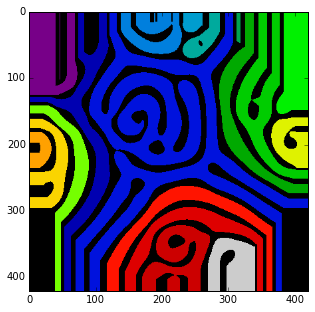

173 18 -1
[-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18]


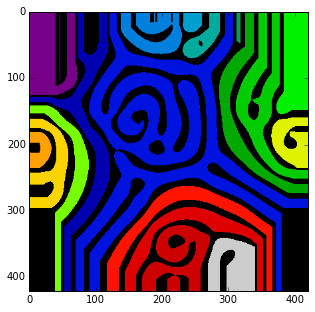

172 18 -1
[-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18]


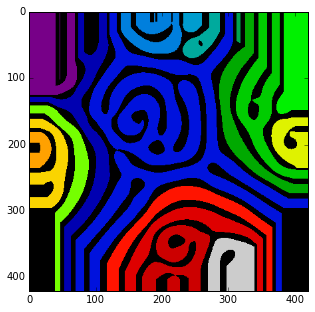

171 18 -1
[-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18]


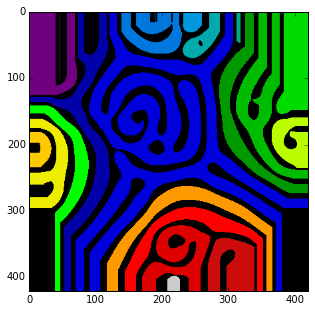

170 19 -1
[-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]


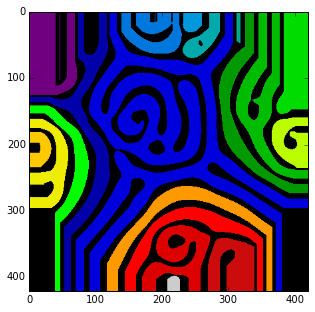

169 19 -1
[-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]


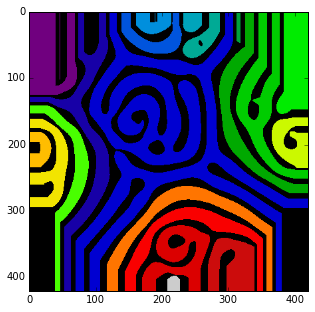

168 20 -1
[-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]


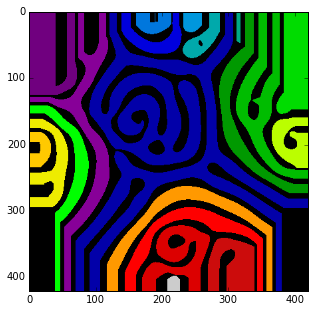

167 19 -1
[-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]


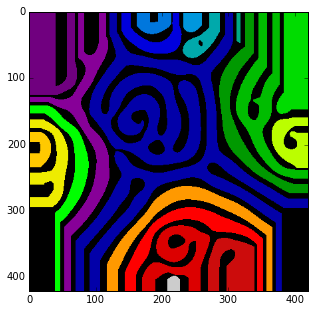

166 19 -1
[-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]


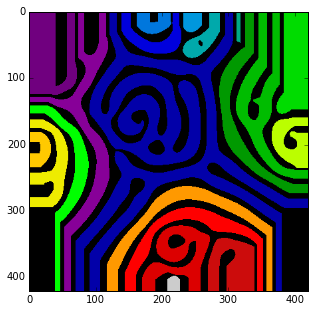

165 19 -1
[-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]


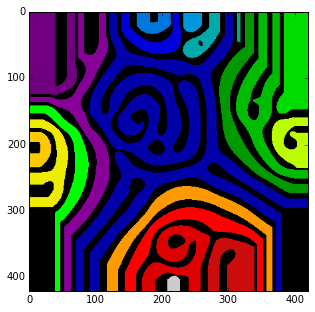

164 19 -1
[-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]


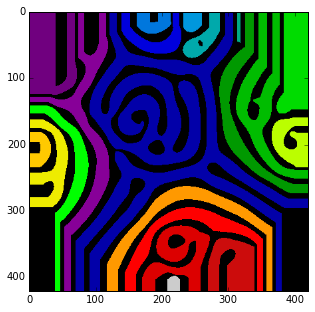

163 19 -1
[-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]


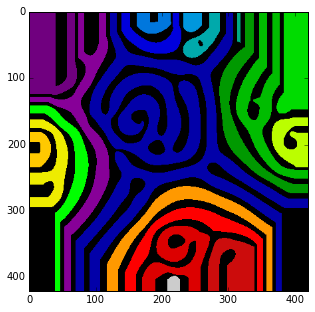

162 19 -1
[-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]


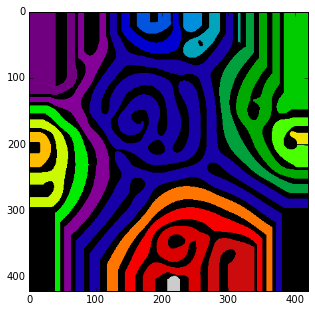

161 20 -1
[-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]


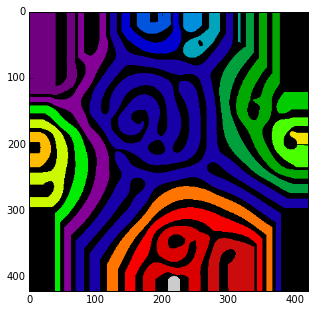

160 20 -1
[-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]


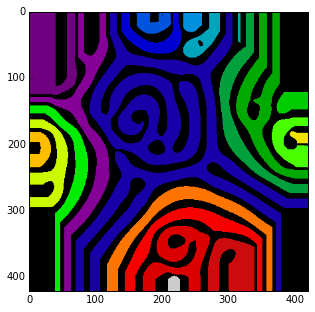

159 20 -1
[-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]


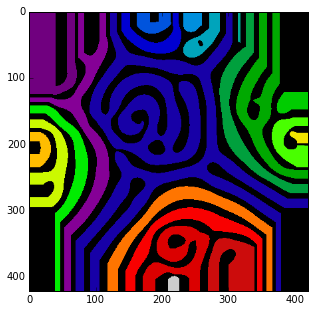

158 20 -1
[-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]


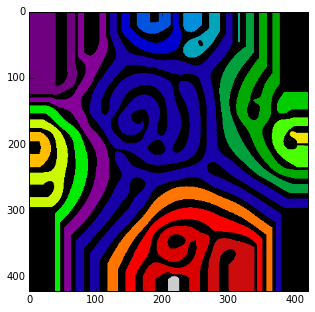

157 20 -1
[-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]


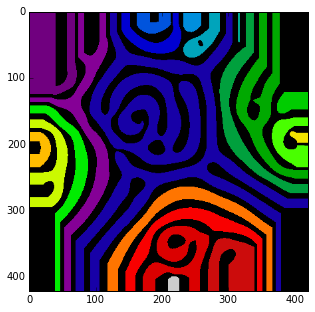

156 20 -1
[-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]


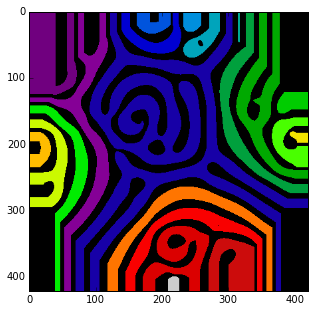

155 20 -1
[-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]


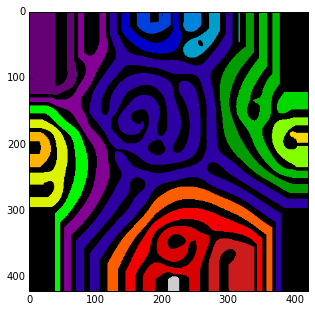

154 21 -1
[-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]


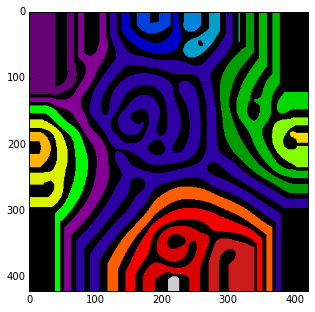

153 21 -1
[-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]


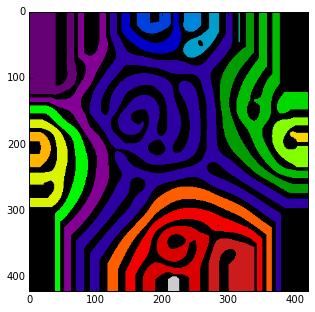

152 21 -1
[-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]


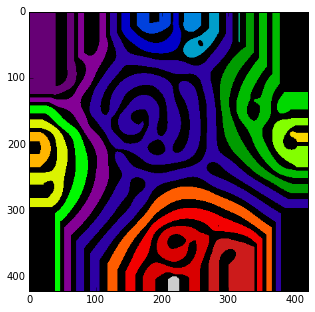

151 21 -1
[-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]


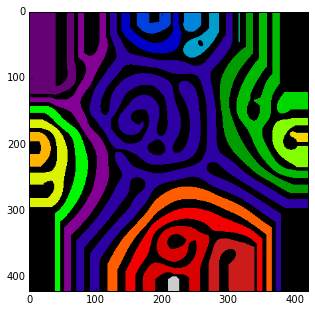

150 21 -1
[-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]


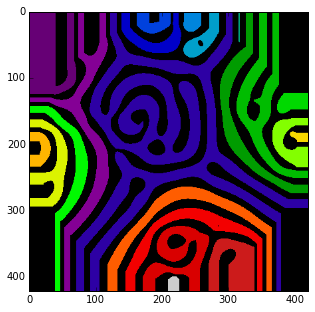

149 21 -1
[-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]


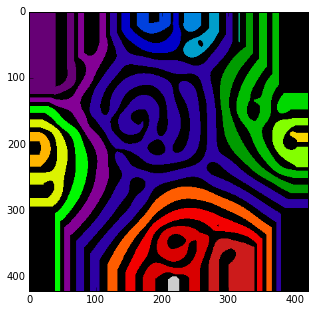

148 21 -1
[-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]


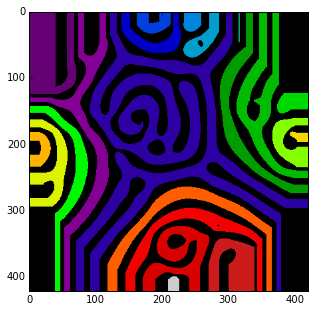

147 21 -1
[-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]


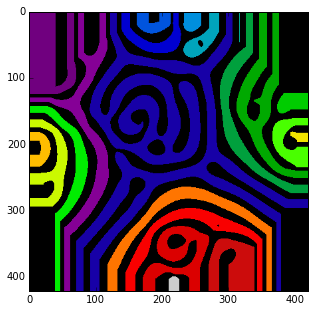

146 20 -1
[-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]


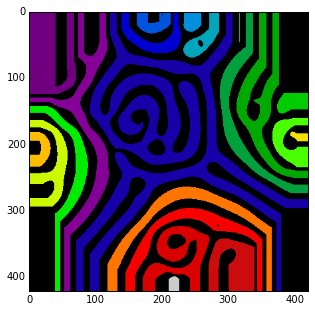

145 20 -1
[-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]


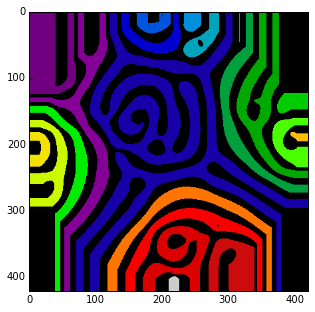

144 20 -1
[-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]


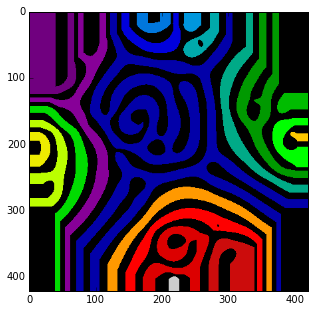

143 19 -1
[-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]


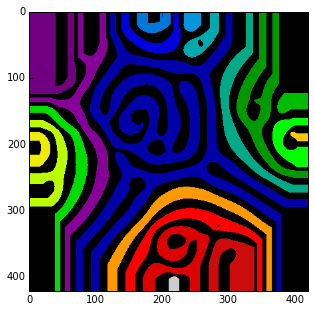

142 19 -1
[-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]


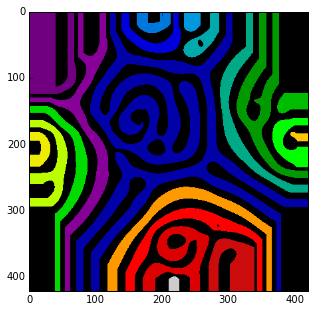

141 19 -1
[-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]


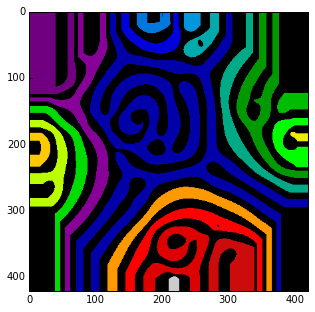

140 19 -1
[-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]


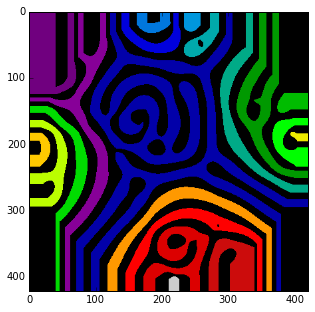

139 19 -1
[-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]


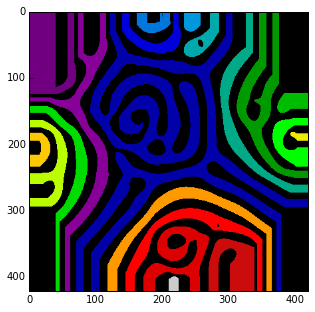

138 19 -1
[-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]


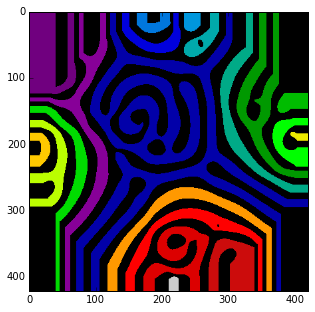

137 19 -1
[-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]


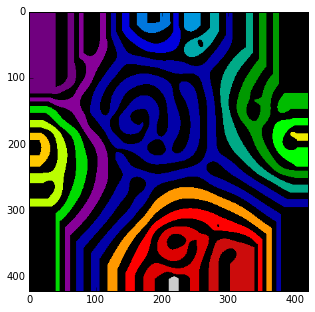

136 19 -1
[-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]


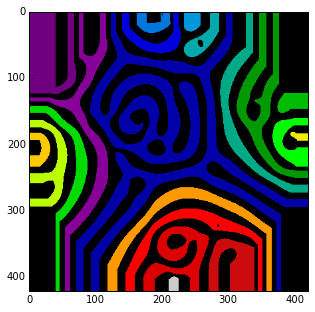

135 19 -1
[-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]


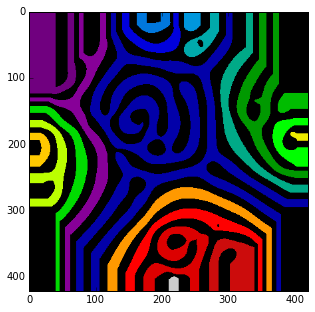

134 19 -1
[-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]


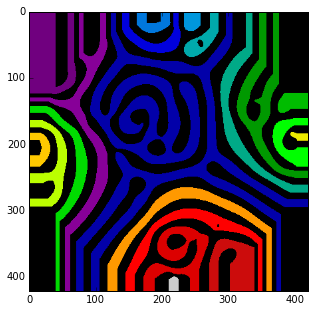

133 19 -1
[-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]


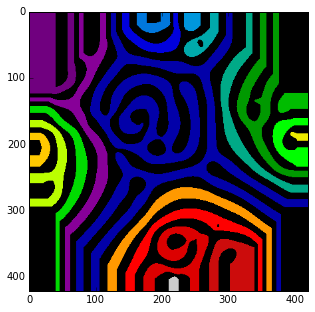

132 19 -1
[-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]


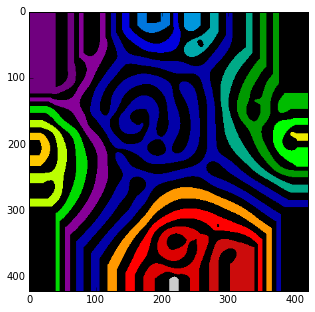

131 19 -1
[-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]


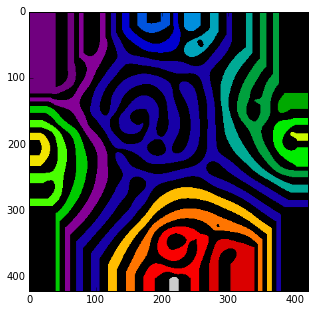

130 20 -1
[-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]


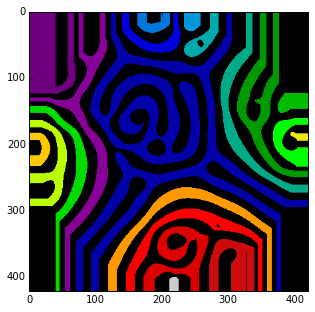

129 19 -1
[-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]


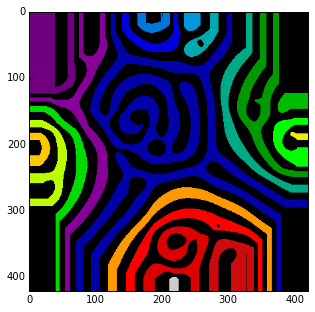

128 19 -1
[-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]


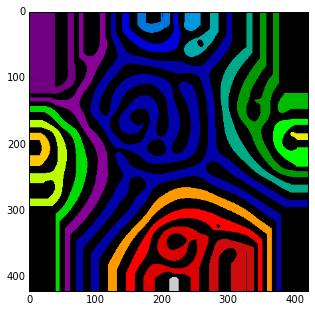

127 19 -1
[-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]


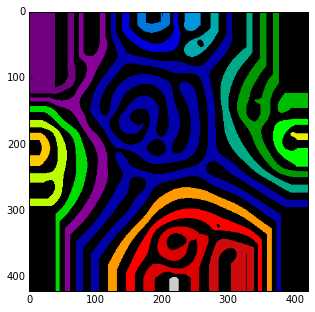

126 19 -1
[-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]


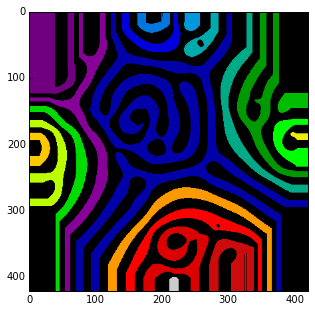

125 19 -1
[-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]


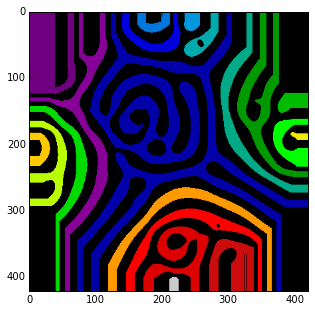

124 19 -1
[-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]


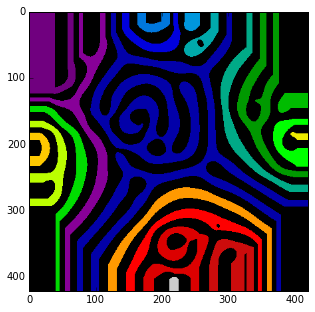

123 19 -1
[-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]


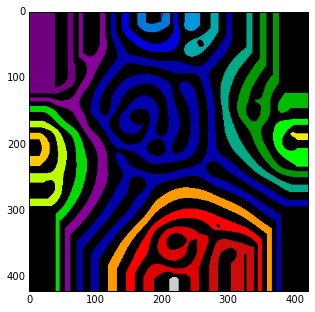

122 19 -1
[-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]


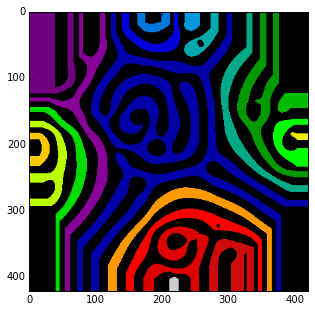

121 19 -1
[-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]


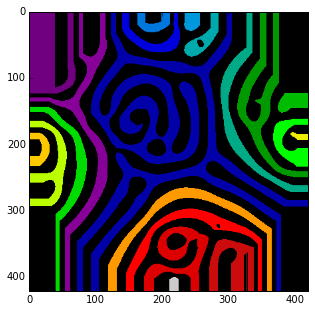

120 19 -1
[-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]


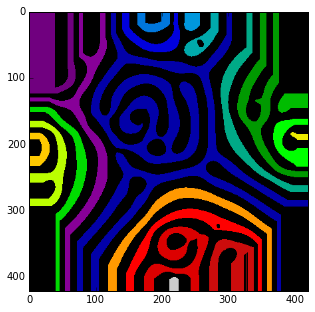

119 19 -1
[-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]


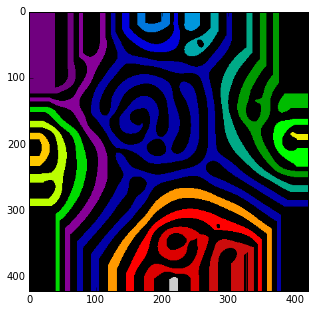

118 19 -1
[-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]


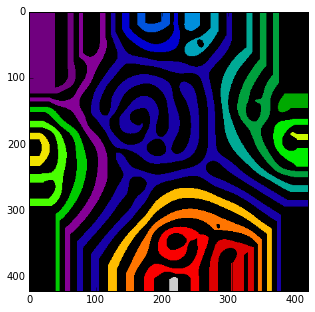

117 20 -1
[-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]


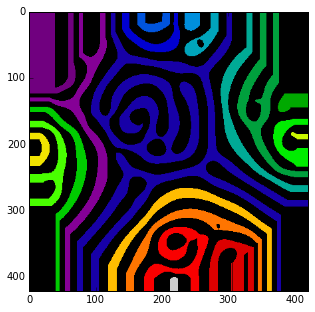

116 20 -1
[-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]


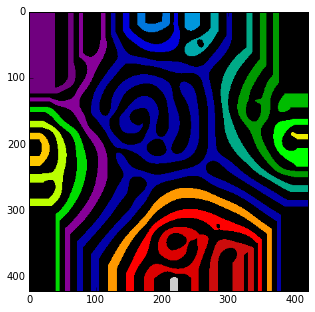

115 19 -1
[-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]


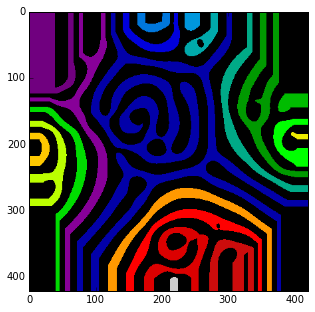

114 19 -1
[-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]


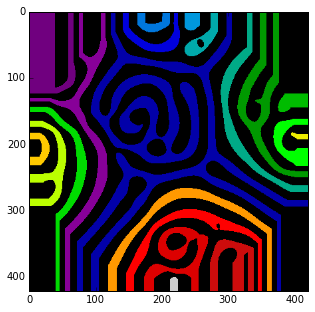

113 19 -1
[-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]


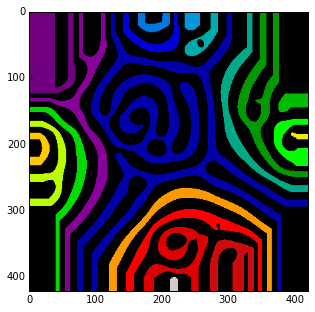

112 19 -1
[-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]


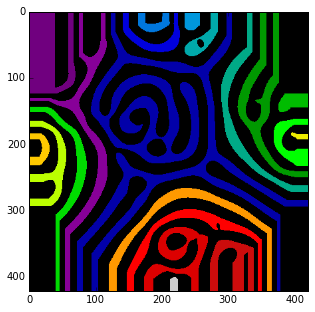

111 19 -1
[-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]


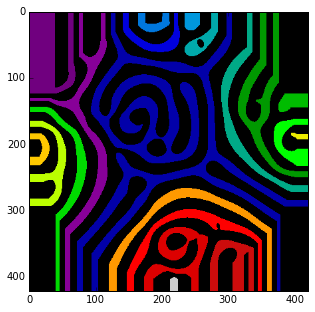

110 19 -1
[-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]


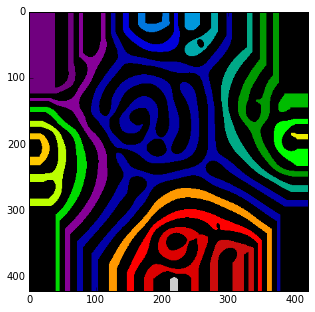

109 19 -1
[-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]


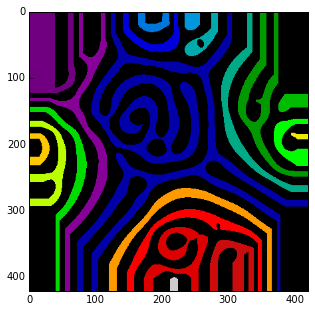

108 19 -1
[-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]


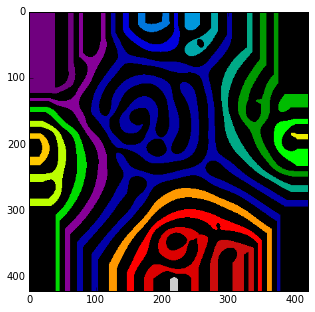

107 19 -1
[-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]


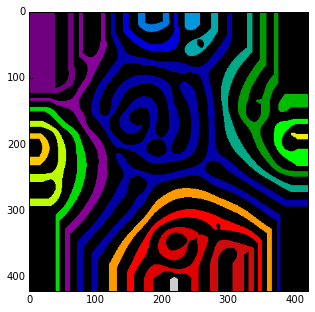

106 19 -1
[-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]


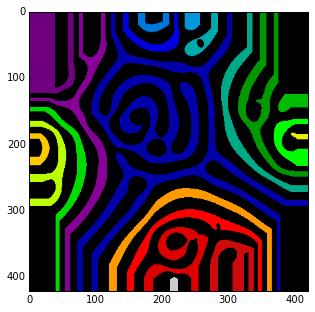

105 19 -1
[-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]


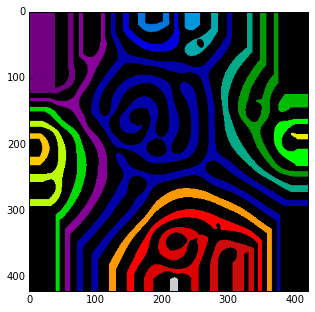

104 19 -1
[-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]


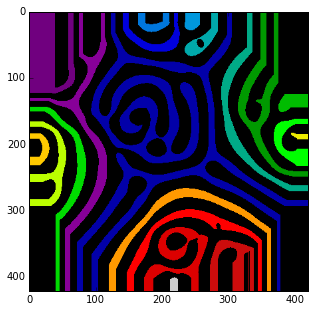

103 19 -1
[-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]


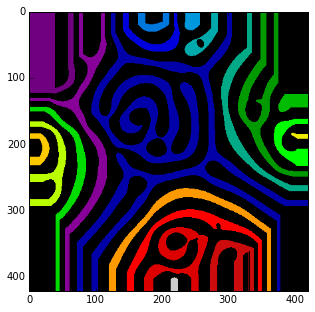

102 19 -1
[-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]


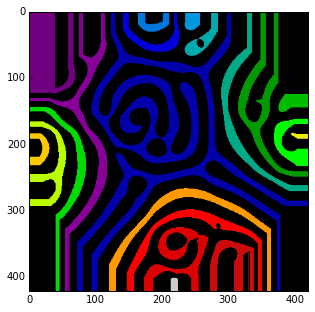

101 19 -1
[-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]


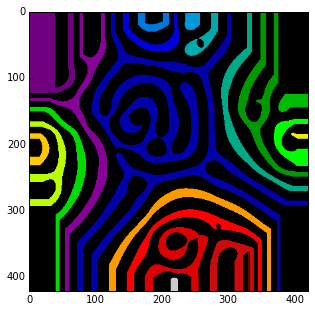

100 19 -1
[-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]


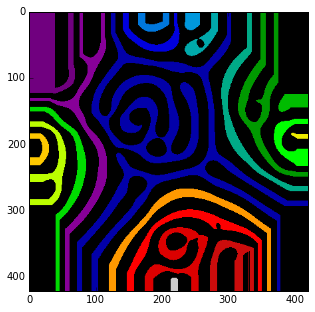

99 19 -1
[-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]


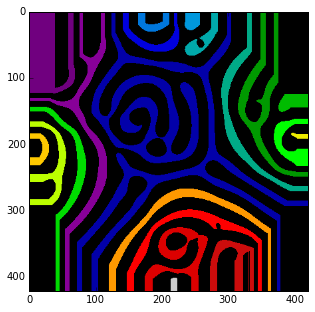

98 19 -1
[-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]


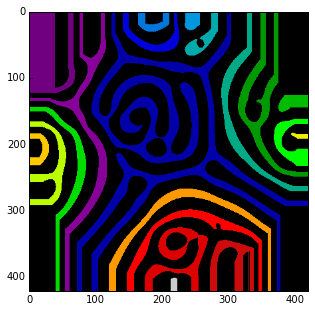

97 19 -1
[-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]


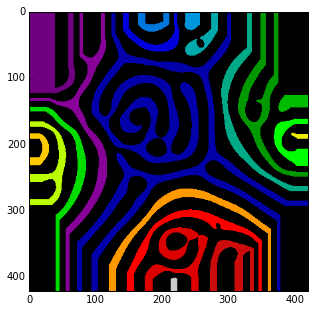

96 19 -1
[-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]


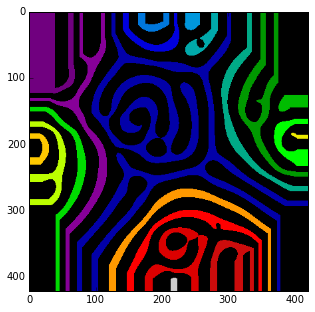

95 19 -1
[-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]


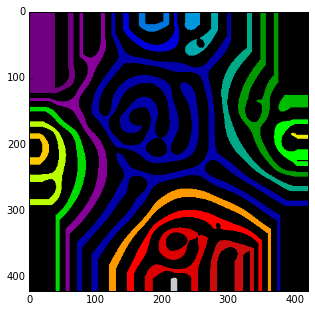

94 19 -1
[-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]


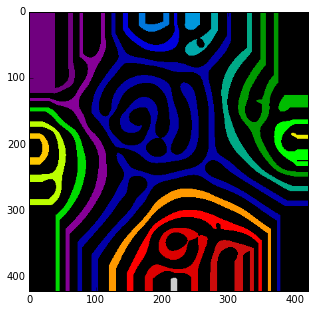

93 19 -1
[-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]


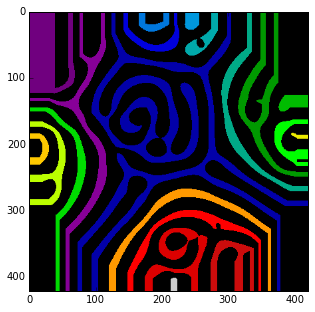

92 19 -1
[-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]


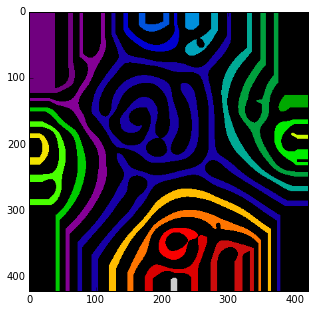

91 20 -1
[-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]


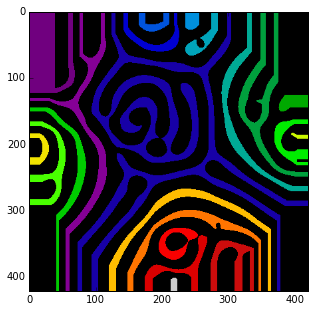

90 20 -1
[-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]


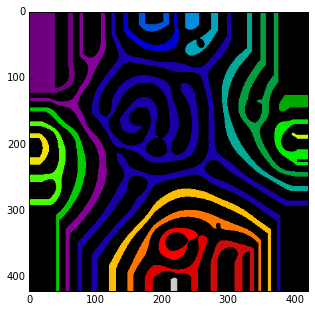

89 20 -1
[-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]


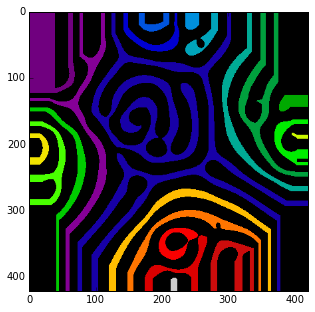

88 20 -1
[-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]


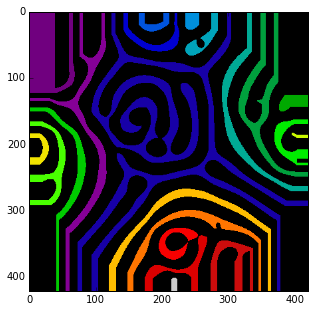

87 20 -1
[-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]


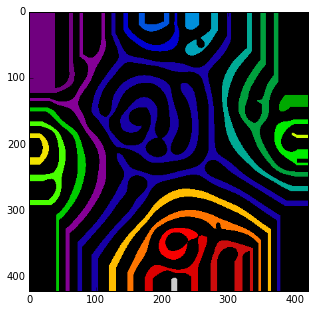

86 20 -1
[-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]


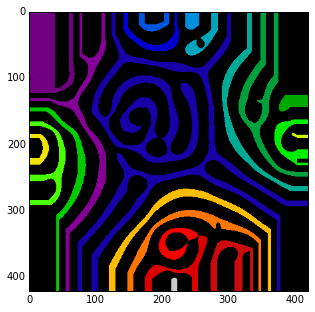

85 20 -1
[-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]


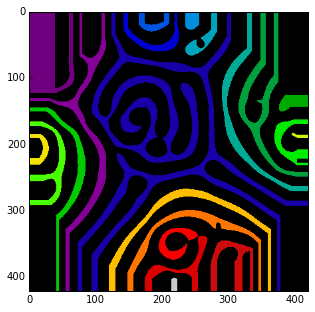

84 20 -1
[-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]


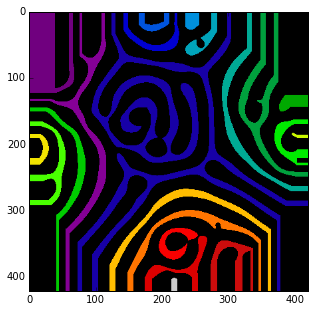

83 20 -1
[-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]


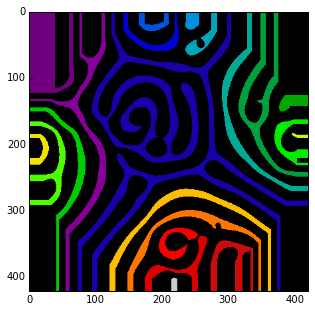

82 20 -1
[-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]


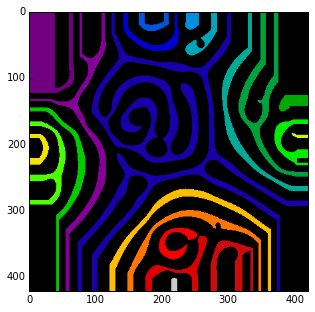

81 20 -1
[-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]


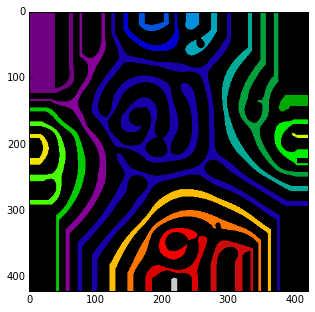

80 20 -1
[-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]


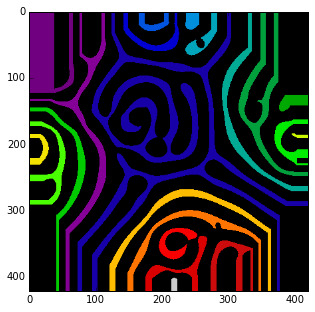

79 20 -1
[-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]


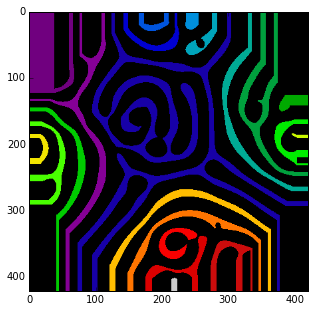

78 20 -1
[-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]


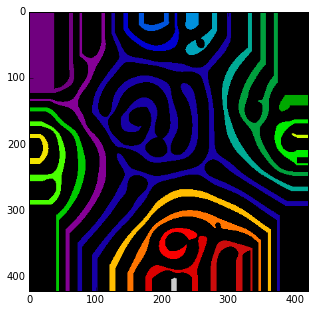

77 20 -1
[-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]


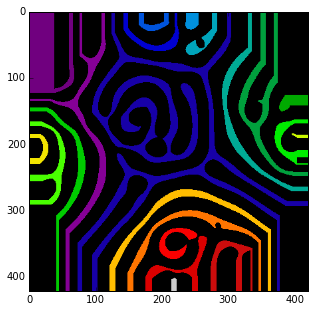

76 20 -1
[-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]


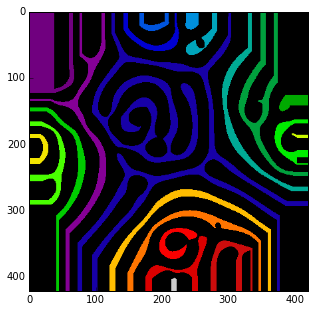

75 20 -1
[-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]


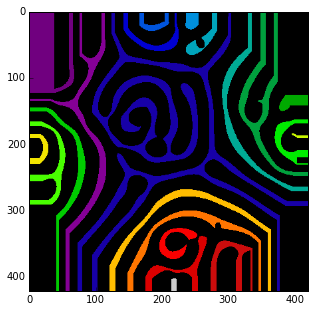

74 20 -1
[-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]


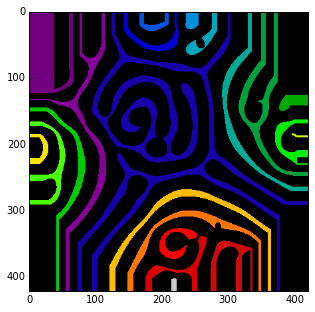

73 20 -1
[-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]


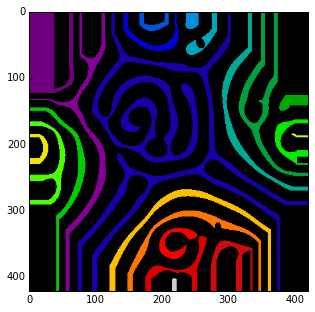

72 20 -1
[-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]


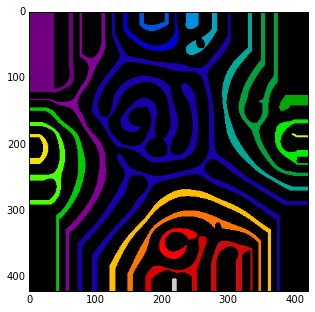

71 20 -1
[-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]


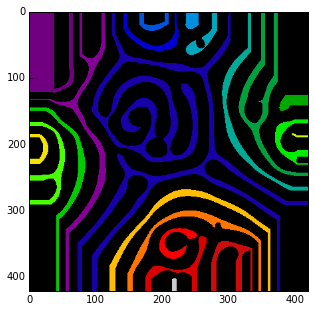

70 20 -1
[-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]


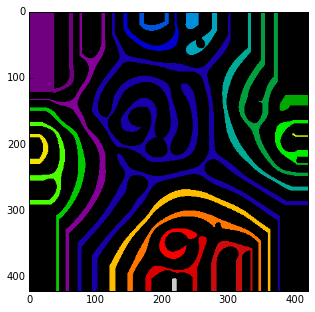

69 20 -1
[-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]


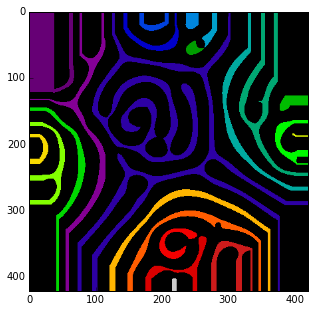

68 21 -1
[-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]


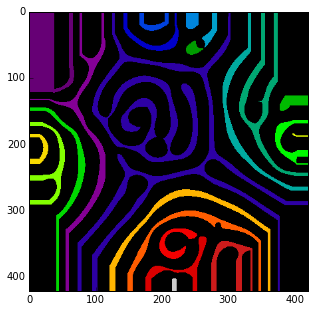

67 21 -1
[-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]


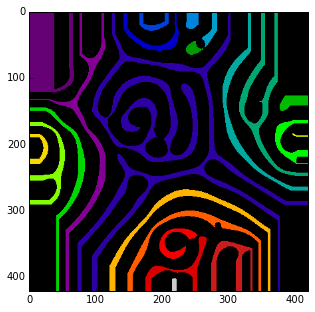

66 21 -1
[-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]


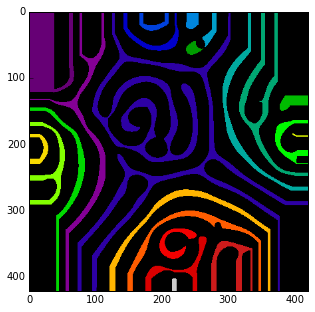

65 21 -1
[-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]


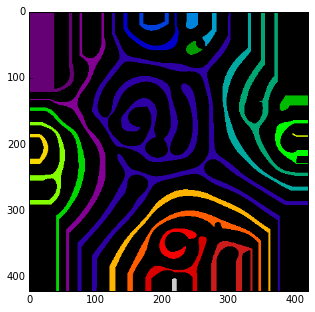

64 21 -1
[-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]


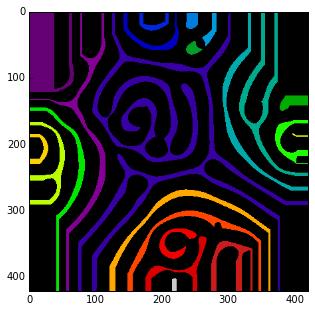

63 22 -1
[-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22]


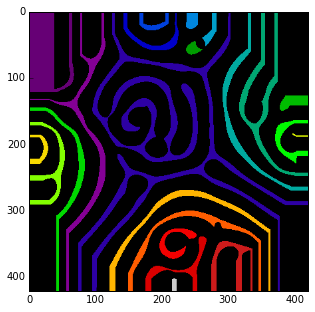

62 21 -1
[-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]


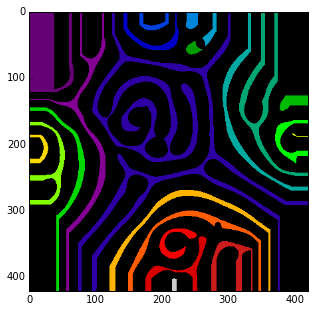

61 21 -1
[-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]


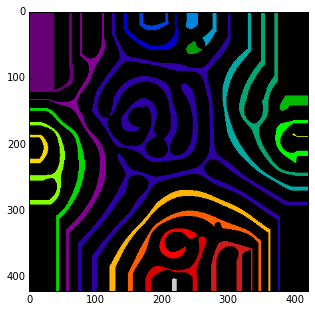

60 21 -1
[-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]


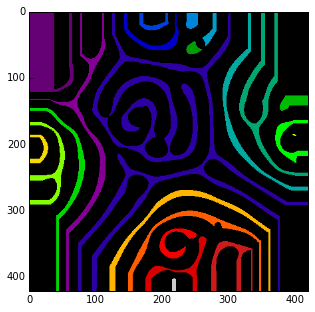

59 21 -1
[-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]


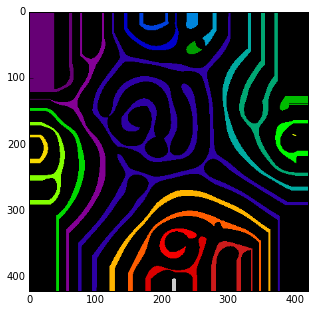

58 21 -1
[-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]


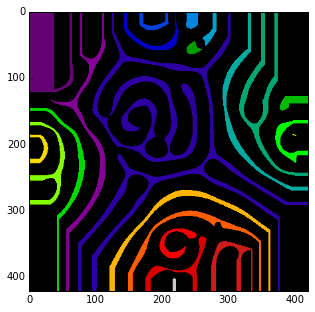

57 21 -1
[-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]


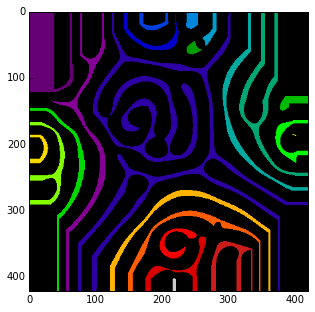

56 21 -1
[-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]


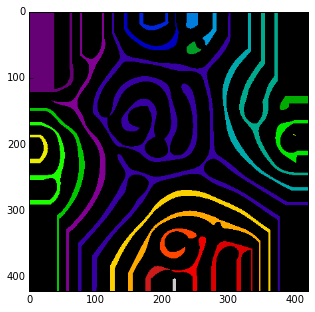

55 22 -1
[-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22]


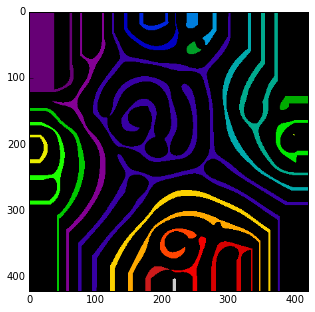

54 22 -1
[-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22]


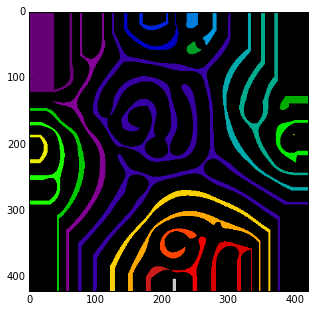

53 22 -1
[-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22]


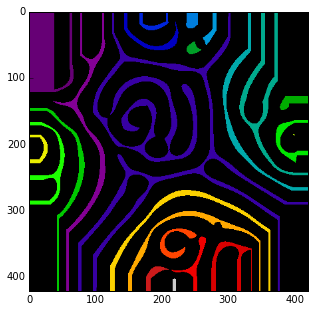

52 22 -1
[-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22]


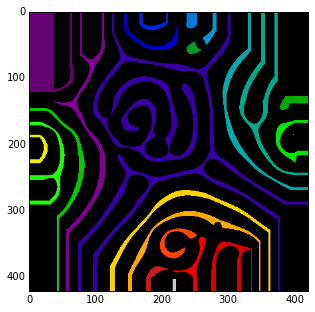

51 22 -1
[-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22]


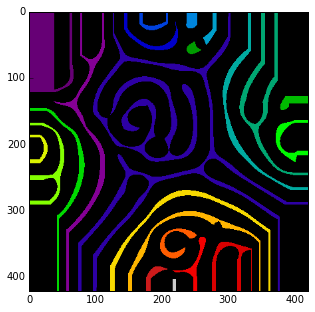

50 21 -1
[-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]


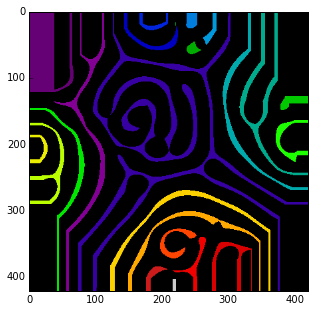

49 22 -1
[-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22]


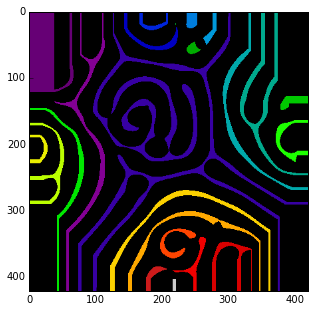

48 22 -1
[-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22]


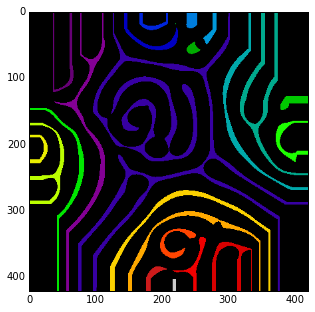

47 22 -1
[-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22]


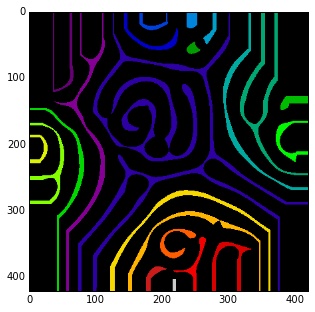

46 21 -1
[-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]


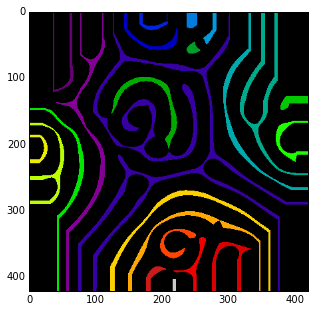

45 22 -1
[-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22]


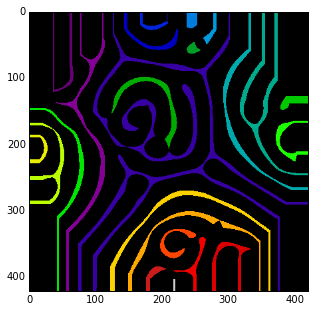

44 22 -1
[-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22]


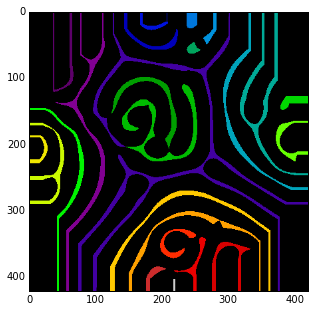

43 23 -1
[-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]


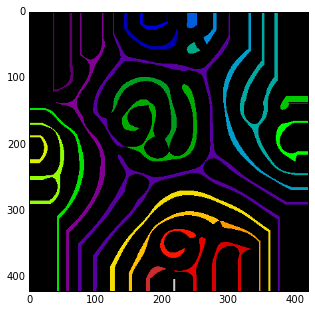

42 24 -1
[-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24]


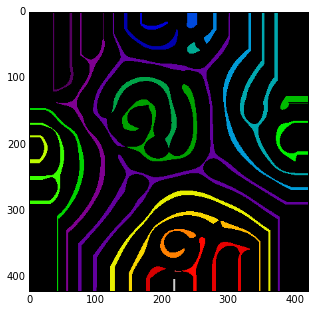

41 25 -1
[-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25]


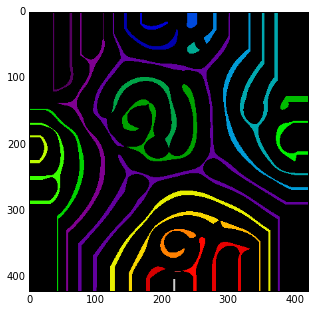

40 25 -1
[-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25]


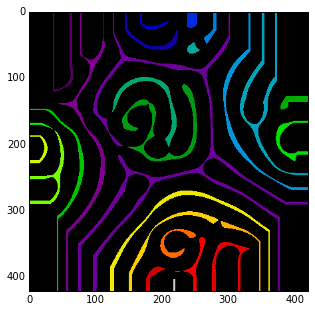

39 26 -1
[-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26]


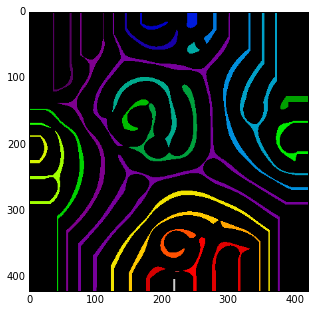

38 27 -1
[-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27]


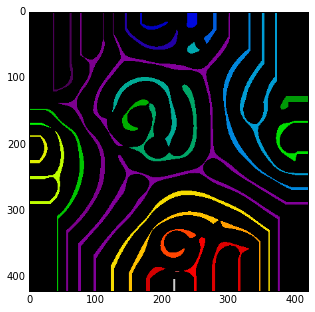

37 28 -1
[-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28]


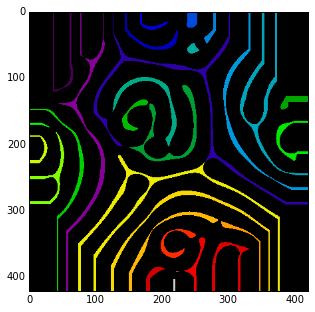

36 29 -1
[-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]


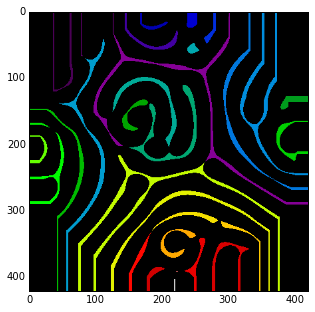

35 31 -1
[-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31]


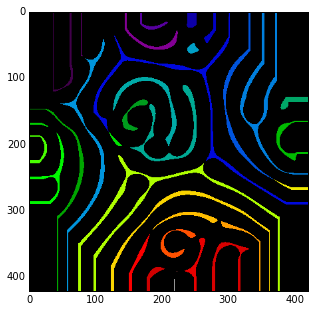

34 33 -1
[-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33]


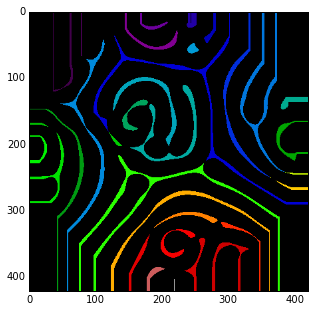

33 35 -1
[-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35]


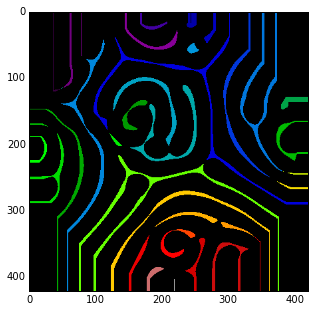

32 39 -1
[-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]


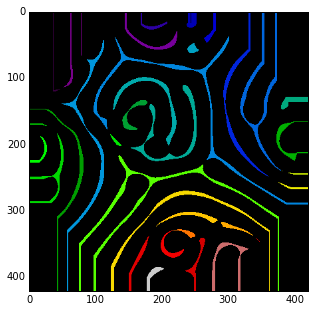

31 36 -1
[-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


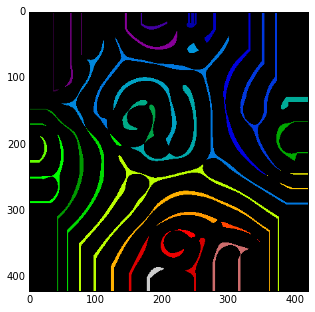

30 39 -1
[-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]


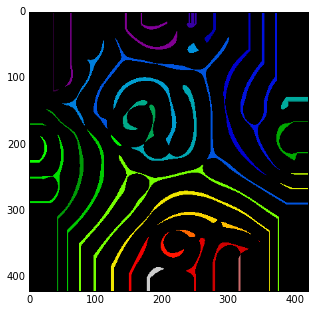

29 37 -1
[-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37]


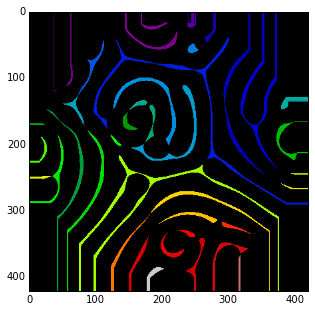

28 41 -1
[-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41]


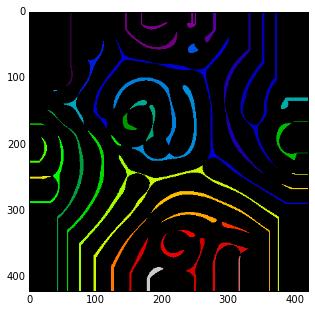

27 41 -1
[-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41]


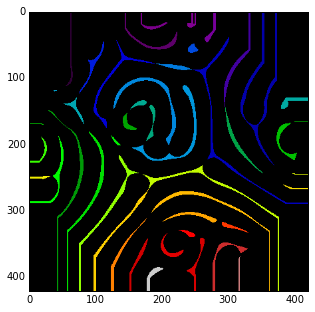

26 46 -1
[-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46]


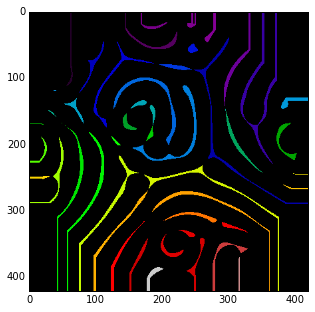

25 52 -1
[-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52]


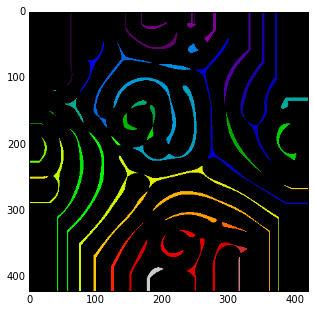

24 48 -1
[-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48]


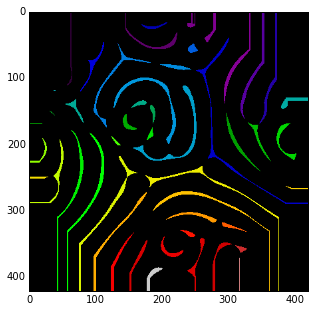

23 49 -1
[-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49]


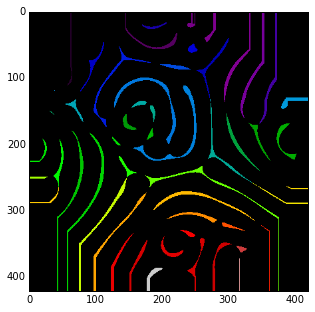

22 55 -1
[-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55]


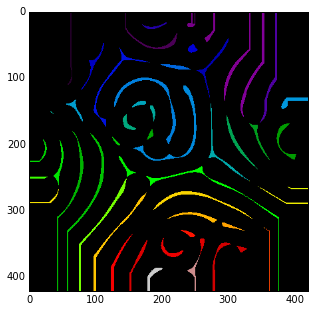

21 56 -1
[-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56]


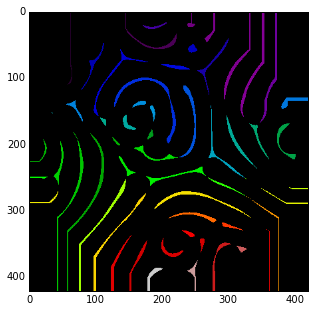

20 63 -1
[-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63]


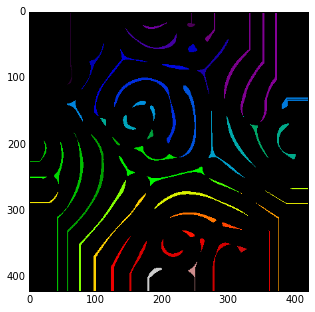

19 62 -1
[-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62]


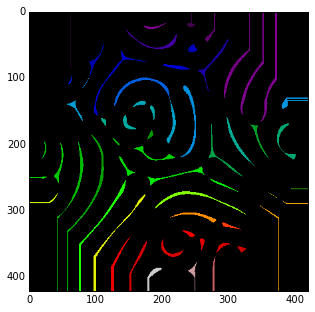

18 70 -1
[-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70]


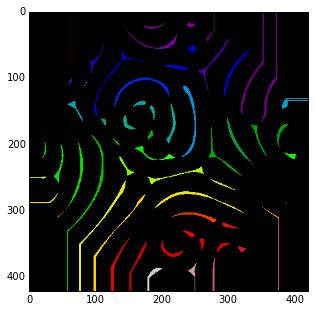

17 64 -1
[-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64]


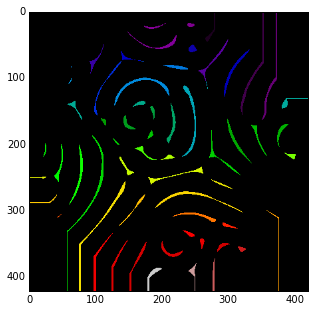

16 67 -1
[-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67]


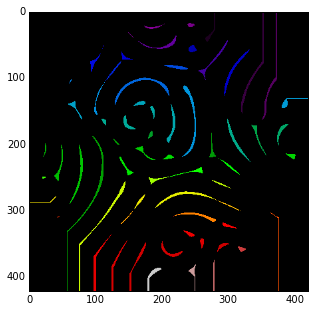

15 77 -1
[-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73
 74 75 76 77]


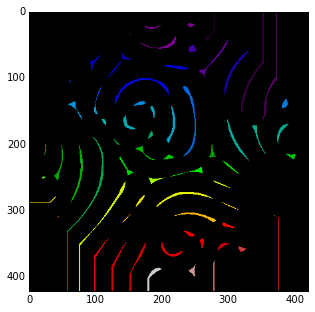

14 77 -1
[-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73
 74 75 76 77]


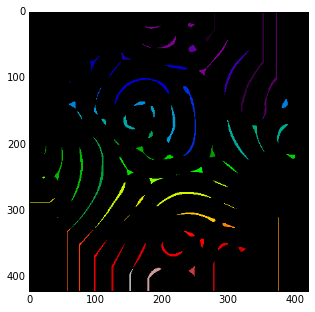

13 76 -1
[-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73
 74 75 76]


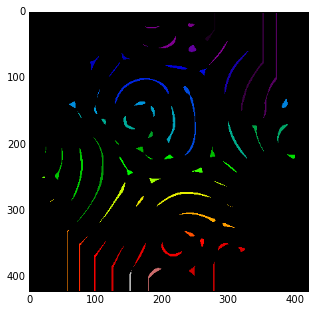

12 77 -1
[-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73
 74 75 76 77]


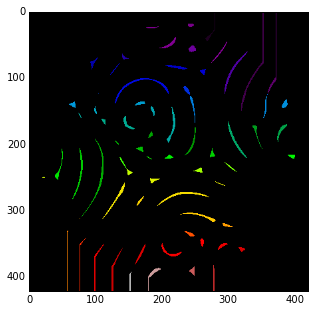

11 72 -1
[-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72]


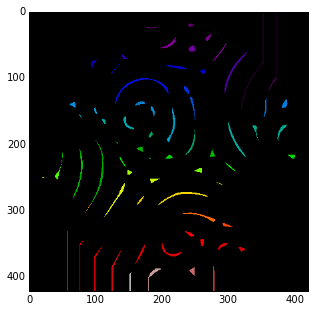

10 80 -1
[-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73
 74 75 76 77 78 79 80]


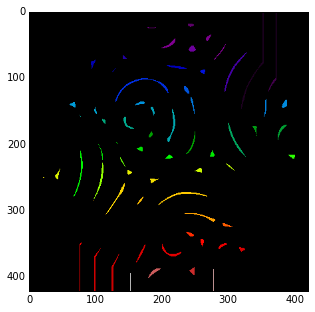

9 71 -1
[-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71]


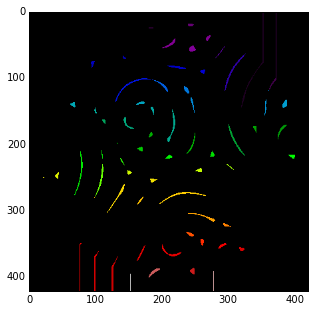

8 66 -1
[-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66]


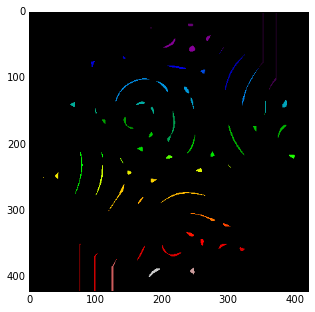

7 68 -1
[-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68]


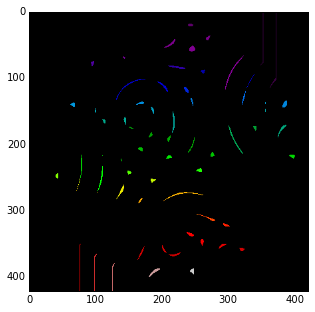

6 73 -1
[-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73]


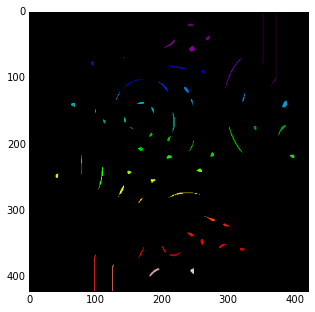

5 68 -1
[-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68]


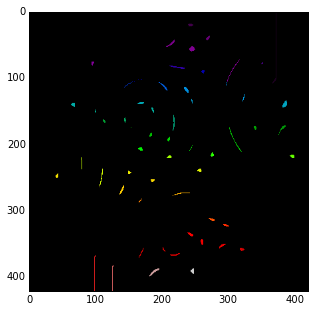

4 66 -1
[-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66]


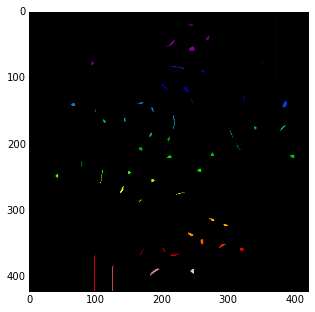

3 60 -1
[-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60]


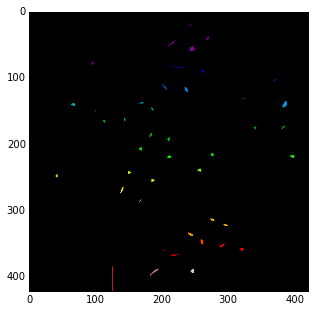

2 45 -1
[-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45]


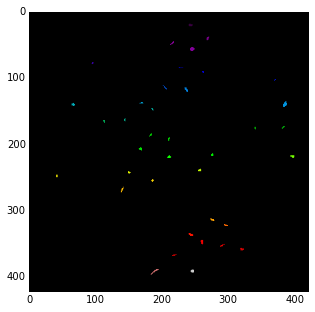

1 37 -1
[-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37]


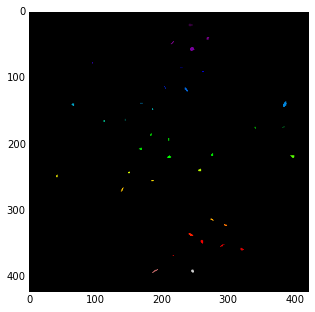

0 36 -1
[-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


In [22]:
plt.rcParams['figure.figsize'] = (5.0, 5.0)

idx = 1000

im = load_image_data(myproject, idx)
c = cropping_region()

plt.imshow(im.bmp)

all_components = {}

# Loop through prior components
# Intersect with new components
# If no intersection, add that prior component to the stack
# If a unique intersection, continue
# If multiple intersections:
#   - split into multiple continuation parts (these become new prior components)
#   - assign new labels to each split
#   - increment ids
#   - assign pixel values to prior component id number, subtracting intersecting components

# Set epsilon limit.
# If the death cells are on different components and those components merge > 2*epsilon above the max death
# then the two cells' vineyards could not have been ambiguous, assuming that the interior of the homotopy
# stays within epsilon of the beginning _and_ ending image.

prior_components = {}

component_id = 0

for level in range(256, -1, -1):
    level_components = measure.label(im.bmp <= level, background=0)
    
    plt.imshow(level_components, cmap='spectral')
    plt.show()
    print level, np.max(level_components), np.min(level_components)
    
    component_list = np.unique(level_components)
    for component in component_list:
        
    

## Generate the Merge Tree of the image

<matplotlib.colorbar.Colorbar instance at 0x11564a488>

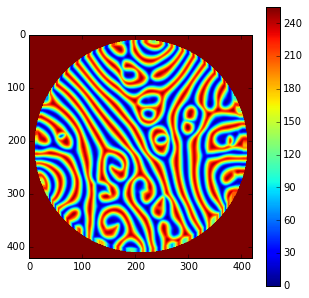

In [15]:
plt.rcParams['figure.figsize'] = (5.0, 5.0)

idx = 1500

im = load_image_data(myproject, idx)
c = cropping_region()
c = 1-c

im.bmp[c==1] = 255

image = im.bmp.copy()

# image = image[175:225, 225:275]

plt.imshow(image)
plt.colorbar()


In [1]:
plt.rcParams['figure.figsize'] = (10.0, 10.0)

min_height = 0
max_height = 255
height_step = 1

plot_the_tree = 1
debug_me = 0

if plot_the_tree:
    x, y = ogrid[0:image.shape[0], 0:image.shape[1]]
    ax = gca(projection='3d')
    ax.plot_surface(x, y, min_height, rstride=5, cstride=5, 
                    facecolors=np.dstack((image/255., image/255., image/255., np.ones(image.shape)*1.)),
                    shade=False)
    ax.set_zlim3d(min_height,max_height)
    ax.view_init(elev=5)
    

# Get the initial connected components
prev_level_components = measure.label((image <= min_height).astype(int), background=0)


prev_component_list = np.unique(prev_level_components)
prev_component_list = prev_component_list[prev_component_list >= 0]

if debug_me:
    print 'Prev components:'
    plt.imshow(prev_level_components)
    plt.colorbar()
    plt.show()
    print 'Prev components list:', prev_component_list



# Loop through the rest of the heights
for height in range(min_height+height_step, max_height+1, height_step):
    
    # Get current connected components in sublevel set up to height
    level_components = measure.label(image <= height, background=0)

    component_list = np.unique(level_components)
    component_list = component_list[component_list >= 0]
    

    if debug_me:
        print 'Current components:'
        plt.imshow(level_components)
        plt.colorbar()
        plt.show()
        print 'Current components list:', component_list
    
#     print 'Current components:', component_list
    
    # Loop through each current component
    for component_no in component_list:
        
        if debug_me:
            print 'Current component number:', component_no, " and Component:"
            plt.imshow(level_components==component_no)
            plt.colorbar()
            plt.show()
        
        # Current component's center of mass
        current_component = (level_components == component_no)
        current_center = ndimage.measurements.center_of_mass(current_component)
        
        # Determine which previous components it intersects with
        intersect_components = np.unique(prev_level_components[current_component])
        if debug_me:
            print 'Intersecting components:', intersect_components
        
        # Loop through each of these
        for i_component in intersect_components:
            if i_component >= 0:
                # Get intersected component's center of mass
                i_center = ndimage.measurements.center_of_mass((prev_level_components==i_component).astype(int))

                if plot_the_tree:
                    # Plot a 3D line for each of these, where each vertex is at the center of mass of the component
                    ax.plot([i_center[0], current_center[0]], 
                            [i_center[1], current_center[1]], 
                            [(height-height_step), height], 
                            'r-')

    # Update the previous components plot list
    prev_level_components = level_components.copy()
    prev_component_list = component_list.copy()
    
    if debug_me:
        print 'Prev components:'
        plt.imshow(prev_level_components)
        plt.colorbar()
        plt.show()
        print 'Prev components list:', prev_component_list
    

if plot_the_tree:
    plt.show()



NameError: name 'plt' is not defined